## INTRODUCTION
***
Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

## GOAL
***
To Predict the probability of a Customer not paying back on a loan in the next two years

## METHODS
***
### Feature Engineering
- Weight of Evidence (WOE)
- P-value for Feature Selection
### Algorithms
- Logistic Regression (Baseline Model)
- Random Forest
### Evaluation
- Precision, Recall, F1-score, roc_auc

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-training.csv', index_col = 0)
df_test = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-test.csv', index_col = 0)
df_entry = pd.read_csv('/kaggle/input/GiveMeSomeCredit/sampleEntry.csv', index_col = 0)

In [3]:
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df_test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

# Observations
- Training dataset have 150,000 records<br>
- Test dataset have 101,503 records<br>
- There are 10 Numeric Independent Variables<br>
- SeriousDlqin2yrs is the Dependent Variable<br>

#  MISSING VALUES

In [7]:
pd.DataFrame({'count':df_train.isnull().sum().values, 'ratio': df_train.isnull().mean() * 100})

,count,ratio
SeriousDlqin2yrs,0,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,29731,19.820667
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


In [8]:
pd.DataFrame({'count':df_test.isnull().sum().values, 'ratio': df_test.isnull().mean() * 100})

,count,ratio
SeriousDlqin2yrs,101503,100.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,20103,19.805326
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


## Note
- MonthlyIncome and Number of Dependents  have ~20% and ~2.6% missing values respectively on both Training and Test Dataset

In [9]:
df_train[df_train['MonthlyIncome'].isnull()][['NumberOfDependents', 'DebtRatio']].describe()

,NumberOfDependents,DebtRatio
count,25807.000000,29731.000000
mean,0.316310,1673.396556
std,0.809944,4248.372895
min,0.000000,0.000000
25%,0.000000,123.000000
50%,0.000000,1159.000000
75%,0.000000,2382.000000
max,9.000000,329664.000000


In [10]:
df_train[df_train['NumberOfDependents'].isnull()][['MonthlyIncome', 'DebtRatio']].describe()

,MonthlyIncome,DebtRatio
count,0.0,3924.000000
mean,NaN,1083.812181
std,NaN,4186.731843
min,NaN,0.000000
25%,NaN,21.000000
50%,NaN,358.000000
75%,NaN,1559.000000
max,NaN,220516.000000


In [11]:
df_train[df_train['DebtRatio']>100]['MonthlyIncome'].isnull().sum()/len(df_train)*100, df_test[df_test['DebtRatio']>100]['MonthlyIncome'].isnull().sum()/len(df_test)*100

(15.128666666666668, 15.072460912485344)

In [12]:
df_train[df_train['MonthlyIncome'].isnull()]['NumberOfDependents'].isnull().sum()/len(df_train)*100, df_test[df_test['MonthlyIncome'].isnull()]['NumberOfDependents'].isnull().sum()/len(df_test)*100

(2.616, 2.5871156517541354)

In [13]:
df_train[(df_train['DebtRatio']>100) & (df_train['MonthlyIncome'].notnull())]['MonthlyIncome'].describe()

count    1687.000000
mean        0.569650
std         9.812161
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       401.000000
Name: MonthlyIncome, dtype: float64

In [14]:
df_train[(df_train['DebtRatio']<100) & (df_train['MonthlyIncome'].notnull())]['MonthlyIncome'].describe()

count    1.185800e+05
mean     6.765221e+03
std      1.446456e+04
min      0.000000e+00
25%      3.500000e+03
50%      5.441000e+03
75%      8.300000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

# Handling Missing Monthly Income
* Records with missing Monthly Income have high Debt Ratio (Median 1159)
* Summary Stat of Borrowers with high Debt Ratio shows that the Monthly Income of these Borrowers are 0
* This could mean Borrowers with missing Monthly Income delibrately left the column blank because they are trivial woorkers not earning Monthly Income
* The best method to handle this missing values is to replace it with 0

# Handling Missing Number of Dependents
* Records with missing Number of Dependents occured simultaneously with missing missing MonthlyIncome (i.e they share the same index)
* This shows that same set of borrowers that left their Monthly Income blank also left Number of Dependents field Blank.
* Summary stat of Borrowers with missing monthly Income reveals they have no dependents
* It's quite logical that this category of borrowers with little to no Income have no dependents.
* Thus, the best way to handle this missing values is to replace with 0 which is also consisent with the Range of this Variable

In [15]:
df_train['MonthlyIncome'].replace(np.nan, 0, inplace=True)
df_test['MonthlyIncome'].replace(np.nan, 0, inplace=True)
df_train['NumberOfDependents'].replace(np.nan, 0, inplace=True)
df_test['NumberOfDependents'].replace(np.nan, 0, inplace=True)

## Imbalanced Dataset

In [16]:
df_train['SeriousDlqin2yrs'].value_counts()/len(df_train)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

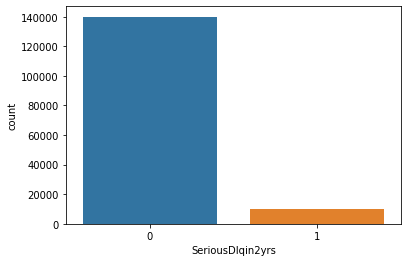

In [17]:
sns.countplot('SeriousDlqin2yrs' ,data=df_train)

## Note
- The target class (SeriousDlqin2yrs) is highly imbalanced (14 : 1)
- Due to the Bias Nature of the Dataset towards a particular class (0), Precision, Recall, F1-score and AUC are the metrics to evaluate our Predictive Models
- Resampling Techniques such as SMOTE and Tomek Links would be employed to improve our model

# EXPLORATORY DATA ANALYSIS
***

### REVOLVING CREDIT UTILIZATION RATIO

In [18]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0


In [19]:
df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] > df_train['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)]['RevolvingUtilizationOfUnsecuredLines'].describe()

count     1500.000000
mean       573.887190
std       2432.276153
min          1.093178
25%          1.163345
50%          1.367219
75%          1.991547
max      50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Box Plot of RevolvingUtilizationOfUnsecuredLines')

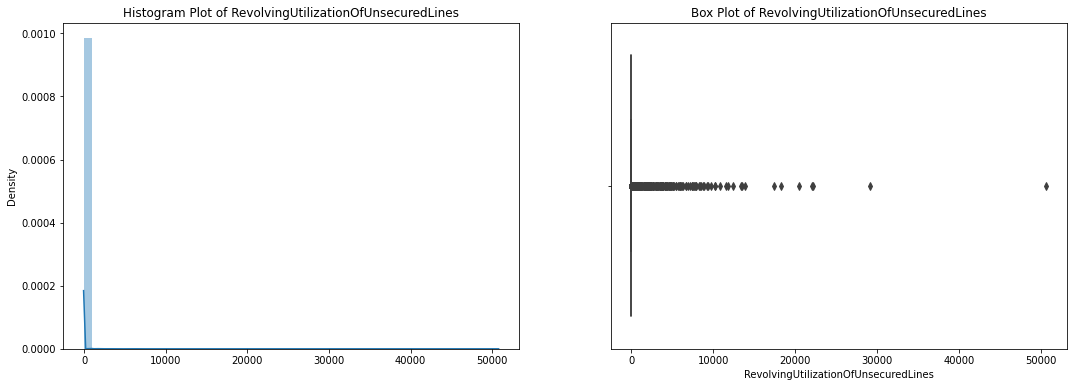

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.distplot(x = np.array(df_train['RevolvingUtilizationOfUnsecuredLines']),
             ax = axes[0])
axes[0].set_title('Histogram Plot of RevolvingUtilizationOfUnsecuredLines')
sns.boxplot(x = df_train['RevolvingUtilizationOfUnsecuredLines'], ax = axes[1])
axes[1].set_title('Box Plot of RevolvingUtilizationOfUnsecuredLines')

Not much sense can be made of the plots due to high level of skewness. The summary stats shows that the mean is 40 times bigger than the median and there is huge change in values beyond the 99th percentile value. There are notable extreme outliers.

In [21]:
below_1 = df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] < 1]['RevolvingUtilizationOfUnsecuredLines'].count()*100/len(df_train)
bet_1_10 = df_train[(df_train['RevolvingUtilizationOfUnsecuredLines'] > 1) &
        (df_train['RevolvingUtilizationOfUnsecuredLines'] < 10)]['RevolvingUtilizationOfUnsecuredLines'].count() * 100/len(df_train)
beyond_10 = df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] > 10]['RevolvingUtilizationOfUnsecuredLines'].count()*100/len(df_train)

Text(0.5, 1.0, '2.0% of Train_Dataset')

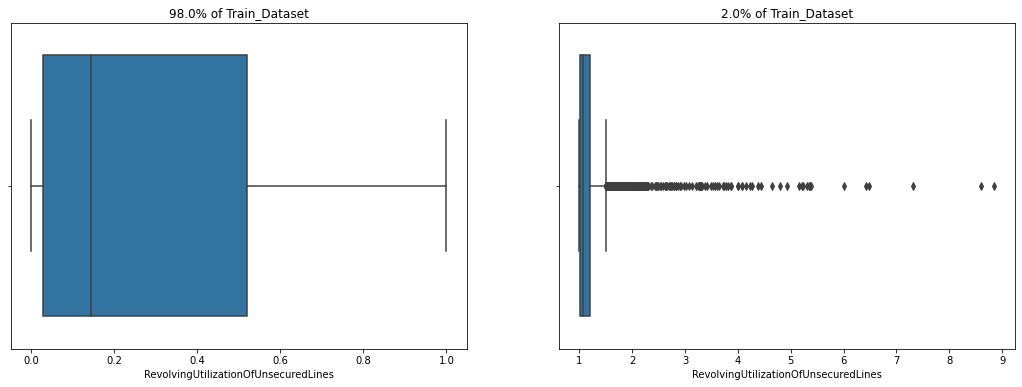

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.boxplot(x = df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] < 1]['RevolvingUtilizationOfUnsecuredLines'],
            ax = axes[0])
axes[0].set_title('{}% of Train_Dataset'.format(round(below_1, 0)))
sns.boxplot(x = df_train[(df_train['RevolvingUtilizationOfUnsecuredLines'] > 1) &
                        (df_train['RevolvingUtilizationOfUnsecuredLines'] < 10)]['RevolvingUtilizationOfUnsecuredLines'],
            ax = axes[1])
axes[1].set_title('{}% of Train_Dataset'.format(round(bet_1_10, 0)))

In [23]:
df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] > 10]['RevolvingUtilizationOfUnsecuredLines'].count()/len(df_train)*100, df_test[df_test['RevolvingUtilizationOfUnsecuredLines'] > 10]['RevolvingUtilizationOfUnsecuredLines'].count()/len(df_test)*100

(0.16066666666666665, 0.1507344610504123)

### Note
Approximately 98% of values of this Variable are between 0 and 1 with a well defined right-skewed distribution. Generally, Credit Utilization is expected to be within this regio (0 - 1). Altough, Borrowers can sometimes spend beyond credit limit. Values between 1 and 10 make up 2% of the dataset. Values beyond 10 are extremely big and they make up less than 0.5% of our data, these values would be dropped to prevent them from impacting our model.

In [24]:
to_drop_train = df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index.values
#to_drop_test = df_test[df_test['RevolvingUtilizationOfUnsecuredLines'] > 10].index.values

In [25]:
#df_train.drop(to_drop_train, axis = 0, inplace = True)
#df_test.drop(to_drop_test, axis = 0, inplace = True)

### DEBT RATIO
***

In [26]:
df_train['DebtRatio'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Box Plot of Debt Ratio')

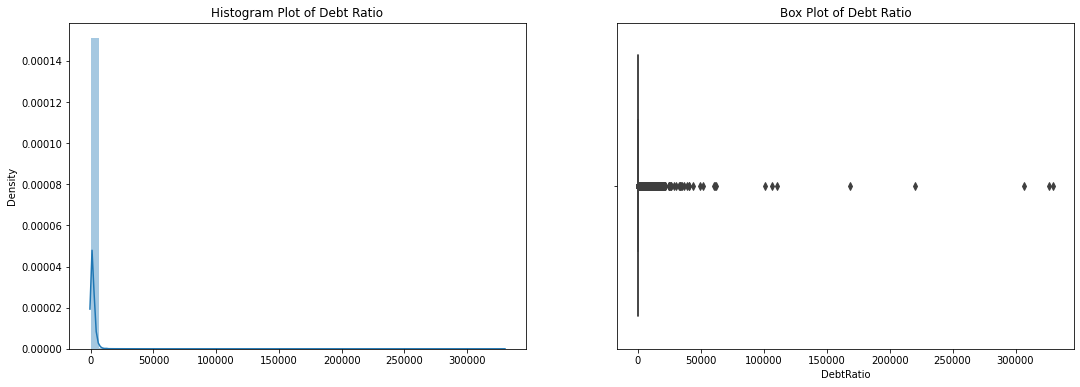

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.distplot(x = np.array(df_train['DebtRatio']),
             ax = axes[0])
axes[0].set_title('Histogram Plot of Debt Ratio')
sns.boxplot(x = df_train['DebtRatio'], ax = axes[1])
axes[1].set_title('Box Plot of Debt Ratio')

In [28]:
pd.DataFrame({'below 1': df_train[df_train['DebtRatio'] <= 1]['DebtRatio'].count()*100/len(df_train),
             'between 1 - 10': df_train[(df_train['DebtRatio'] > 1) &
                                        (df_train['DebtRatio'] <=10)]['DebtRatio'].count()*100/len(df_train),
             'beyond 10': df_train[df_train['DebtRatio'] > 10]['DebtRatio'].count()*100/len(df_train)}, index = [1])

,below 1,between 1 - 10,beyond 10
1,76.575333,4.173333,19.251333


In [29]:
df_train[(df_train['DebtRatio'] > 1) & (df_train['DebtRatio'] <=10)]['DebtRatio'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DebtRatio,6260.0,2.542698,2.198827,1.0005,1.178196,1.52435,3.0,10.0


In [30]:
df_train[df_train['DebtRatio'] > 10]['DebtRatio'].describe().describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DebtRatio,8.0,46117.899031,114970.661136,10.138614,1099.0,2167.454533,10476.608429,329664.0


### Notes
* 76% of values in this variable are between 0 - 1
* 4% are between 1 - 10
* The remaining 20% have high values (Median of 2166). Outliers responsible for skewing the Variable
* These outliers won't be discarded as we've earlier established that they are special case of Borrowers

## AGE
***

Text(0.5, 1.0, 'Test_Dataset')

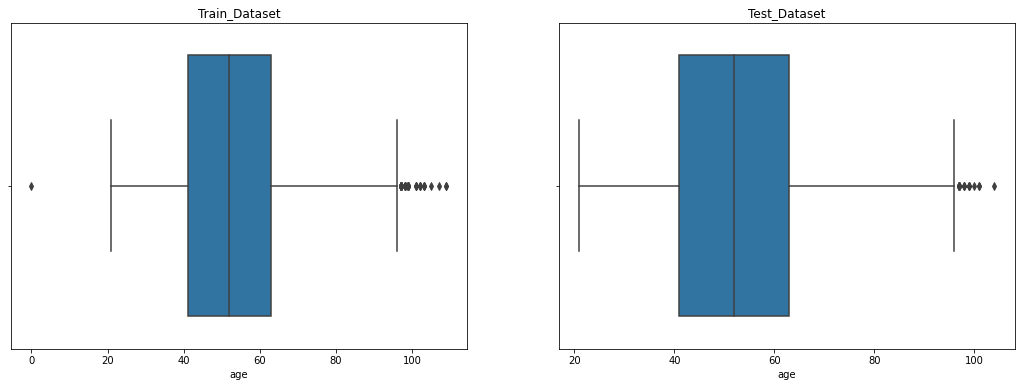

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.boxplot(x= df_train['age'], ax = axes[0])
axes[0].set_title('Train_Dataset')
sns.boxplot(x= df_test['age'], ax = axes[1])
axes[1].set_title('Test_Dataset')

### Note
Age tends to have a somewhat reasonable distribution. There are a suspicious number of centenarians but plausible. The only certainly incorrect data is that there is one person in the dataset with age 0, and because infants are not legally permitted to take out loans, we will impute that to the next youngest person in the dataset.

In [32]:
df_train['age'].replace(0, 18, inplace=True)

## NUMBER OF OPEN CREDIT LINES
***

<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Count'>

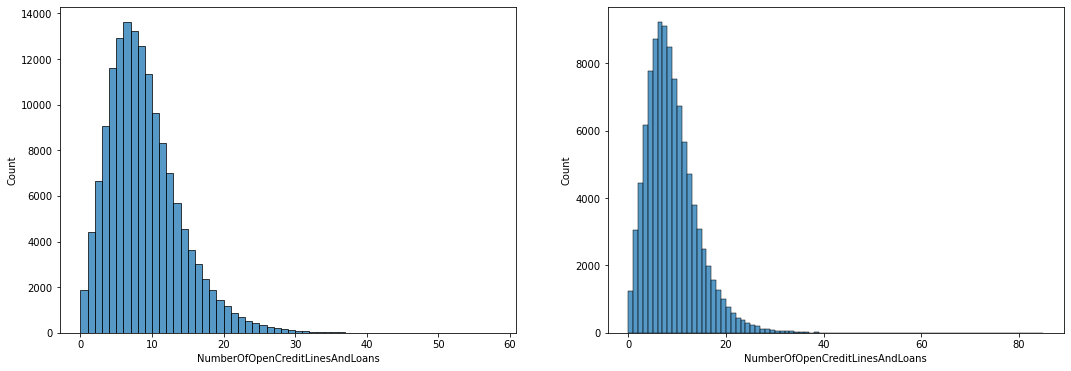

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.histplot(x = df_train['NumberOfOpenCreditLinesAndLoans'], binwidth=1, ax = axes[0])
sns.histplot(x = df_test['NumberOfOpenCreditLinesAndLoans'], binwidth=1, ax = axes[1])

### Note
This variable is right-skewed with no extreme values. Further preprocessing of this data would be aggregating similar Category (Fine Class) to a Coarse class during WOE Feature Engineering and Data Preprocessing.

## NUMBER OF REAL ESTATE LOANS AND LINES
***

<AxesSubplot:xlabel='NumberRealEstateLoansOrLines', ylabel='Count'>

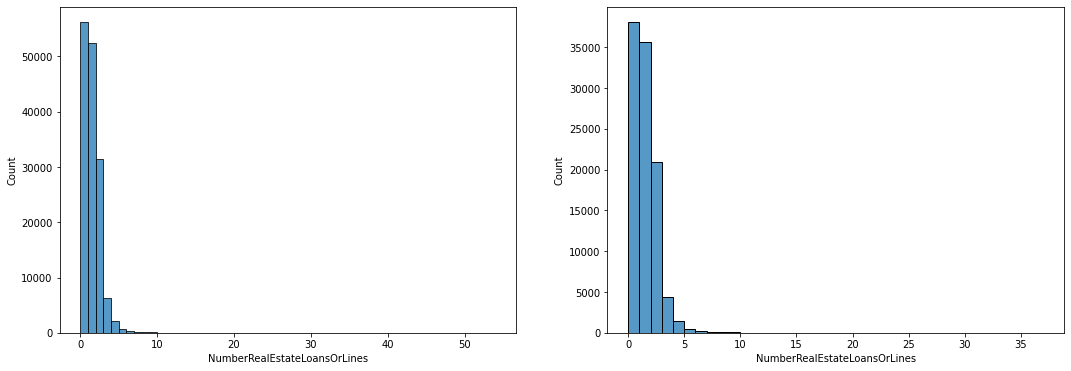

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.histplot(x = df_train['NumberRealEstateLoansOrLines'], binwidth=1, ax = axes[0])
sns.histplot(x = df_test['NumberRealEstateLoansOrLines'], binwidth=1, ax = axes[1])

In [35]:
df_train['NumberRealEstateLoansOrLines'].value_counts()

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
15        7
14        7
17        4
16        4
25        3
18        2
23        2
19        2
20        2
26        1
54        1
21        1
29        1
32        1
Name: NumberRealEstateLoansOrLines, dtype: int64

### Note
This variable is highly skewed to the right, Majority of the Borrowers have between 0 to 2 Mortgage loans. Further preprocessing of this data would be aggregating similar Category (Fine Class) to a Coarse class during WOE Feature Engineering and Data Preprocessing.

## NUMBER OF DEPENDENTS
***

<AxesSubplot:xlabel='NumberOfDependents', ylabel='Count'>

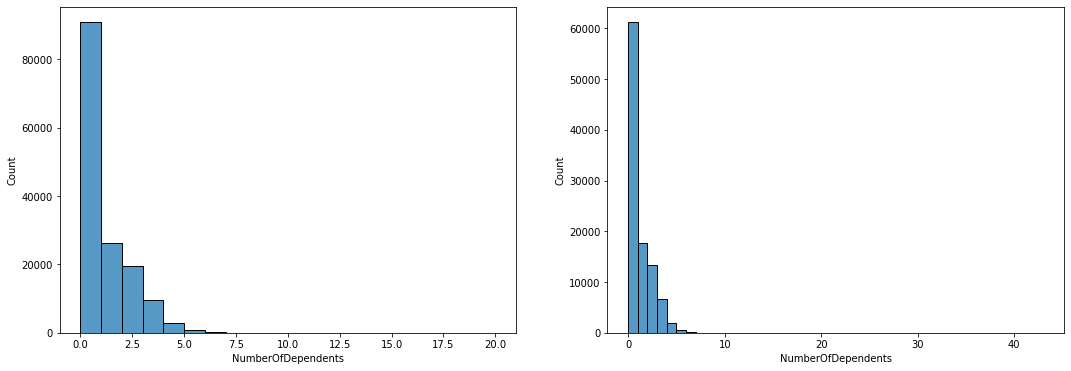

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.histplot(x = df_train['NumberOfDependents'], binwidth=1, ax = axes[0])
sns.histplot(x = df_test['NumberOfDependents'], binwidth=1, ax = axes[1])

### Note
This variable is right skewed. Majority of the Borrowers have between 0 - 3 Dependents. Further preprocessing of this data would be aggregating similar Category (Fine Class) to a Coarse class during WOE Feature Engineering and Data Preprocessing.

### NUMBER OF DAYS PAST DUE
***

In [37]:
due_30_59 = pd.DataFrame(df_train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()).rename(columns = {'NumberOfTime30-59DaysPastDueNotWorse':'30-59days'})
due_60_89 =  pd.DataFrame(df_train['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()).rename(columns = {'NumberOfTime60-89DaysPastDueNotWorse':'60-89days'})
due_90 = pd.DataFrame(df_train['NumberOfTimes90DaysLate'].value_counts()).rename(columns = {'NumberOfTimes90DaysLate':'90days'})
pd.concat([due_30_59, due_60_89, due_90], axis = 1)

,30-59days,60-89days,90days
0,126018.0,142396.0,141662
1,16033.0,5731.0,5243
2,4598.0,1118.0,1555
3,1754.0,318.0,667
4,747.0,105.0,291
5,342.0,34.0,131
6,140.0,16.0,80
7,54.0,9.0,38
8,25.0,2.0,21
9,12.0,1.0,19


In [38]:
df_train[df_train['NumberOfTime30-59DaysPastDueNotWorse'] > 17][['NumberOfTime30-59DaysPastDueNotWorse',
                                                                'NumberOfTime60-89DaysPastDueNotWorse',
                                                                'NumberOfTimes90DaysLate']]

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
1734,98,98,98
2287,98,98,98
3885,98,98,98
4418,98,98,98
4706,98,98,98
...,...,...,...
147775,98,98,98
149154,98,98,98
149240,98,98,98
149440,98,98,98


In [39]:
df_train[df_train['NumberOfTime30-59DaysPastDueNotWorse'] > 17]['SeriousDlqin2yrs'].mean()*100

54.646840148698885

### Note
These Features have similar distribution. There are two unique values (98 and 96). It is impossible for a borrower to exhibit delinquency 98 or 96 times in space of 2 years. It can also be observerd that these values share the same corresponding index, which might indicates Data Entry error. However, they can't be dropped due to high information they possess in identifying defaulting members. 55% of Borrowers in this category defaulted compared to 6% global default rate. Its best we keep them and assign a separate class for these values

## BASELINE MODELS 
***

In [40]:
#import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [41]:
#ROC curve function
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
def plot_roc(y_valid, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, linestyle = '--', color = 'k')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')

In [42]:
df_train.reset_index(drop = True, inplace = True)
#df_test.reset_index(drop = True, inplace = True)

In [43]:
df_train_inputs = df_train.loc[:, df_train.columns.values[1:]]
df_test_inputs = df_test.loc[:, df_train.columns.values[1:]]
df_train_target = df_train.loc[:, df_train.columns.values[0]].to_frame()

In [44]:
#stratified split
X_train, X_valid, y_train, y_valid = train_test_split(np.array(df_train_inputs), np.array(df_train_target),
                                                      test_size = 0.2, random_state = 42, stratify = np.array(df_train_target))

In [45]:
#logistic regression object
lr = LogisticRegression(max_iter=300, solver = 'liblinear')

In [46]:
#fit logistic regression
lr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=300, solver='liblinear')

In [47]:
#predictions 1 or 0
y_pred = lr.predict(X_valid)

In [48]:
#predictions in probalities
y_pred_proba = lr.predict_proba(X_valid)
y_pred_proba = y_pred_proba[: ][: , 1]

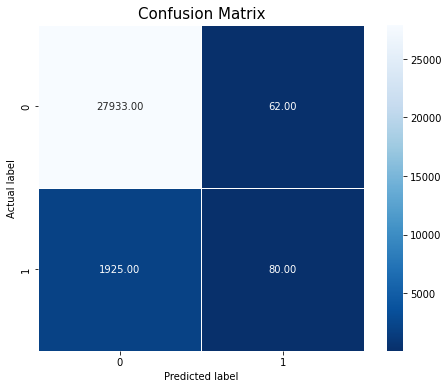

In [49]:
#confusion matrix
cm = metrics.confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

In [50]:
#classification report: recall, precision, f1-score, accuracy
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     27995
           1       0.56      0.04      0.07      2005

    accuracy                           0.93     30000
   macro avg       0.75      0.52      0.52     30000
weighted avg       0.91      0.93      0.91     30000



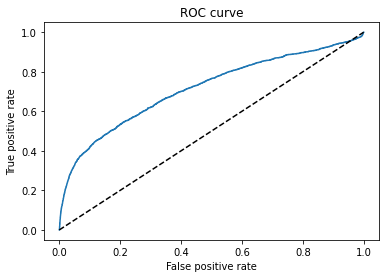

In [51]:
#ROC_curve
plot_roc(y_valid, y_pred_proba)

In [52]:
#AUC score
roc_auc_score(y_valid, y_pred_proba)

0.7138410091933944

In [53]:
y_proba_base = lr.predict_proba(np.array(df_test_inputs))
lr_baseline_model = pd.DataFrame({'Id': df_test.index.values,
                                 'Probability': y_proba_base[:, 1]})
lr_baseline_model.set_index(keys = 'Id', inplace = True)
lr_baseline_model

,Probability
Id,
1,0.060732
2,0.051316
3,0.046438
4,0.124253
5,0.108548
...,...
101499,0.114560
101500,0.322304
101501,0.031357


### Note
Our Baseline model achieves an AUC score of 0.8014. This isn't skillful enough, we need to jack it up.

## WEIGHT OF EVIDENCE
***
### Background
This method is commonly used alongside Logistic Regression for modelling Probability of Default. WOE access the amount of information each attribute (category) of an independent variable has in predicting the class of a target variable. Mathematically, it is the natural log of the ratio of percentage distribution of non-defaulting customers to percentage of defauting customers.

### Steps
* Fine Classing: All Continuous Variables would be binned into several categories base on its distribution. Any variable with more than 50 unique values is considered to be a continuous Variable. Other Numerical variable with less than 50 unique values would have each element as a separate category
* Coarse Classing: Categories with similar WOE value would be binned together. Percentage of observation would also influence coarse classing.
* Dummy variable would be created for each coarse class
* Each variable would have a reference attribute to avoid dummy variable trap

### Information Value and P-Value
Information Value shows the strength of a variable in predicting the target class. It is summation of the product of WOE and the difference between proportion of good customers and bad customers for each Variable category. P-value access the statiscal significance of each variable as a part of total variables in predicting the target class. We are going to use P-value to select statistically significant variables.


## FEATURE ENGINEERING AND DATA PREPROCESSING
***


In [54]:
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = (1 - df['prop_bad']).diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    #df['IV'] = df['IV'].replace([np.inf, -np.inf], np.nan).sum()
    return df

In [55]:
def woe_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = (1 - df['prop_bad']).diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    #df['IV'] = df['IV'].replace([np.inf, -np.inf], np.nan).sum()
    return df

In [56]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

### FINE CLASSING AND COARSE CLASSING NUMBER OF DAYS PAST DUE 30 - 59

In [57]:
df_temp = woe_discrete(df_train_inputs, 'NumberOfTime30-59DaysPastDueNotWorse', df_train_target)
df_temp

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,NumberOfTime30-59DaysPastDueNotWorse,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,11,1,1.000000,0.000007,1.0,0.0,0.000000,0.000100,-inf,NaN,NaN,inf
1,13,1,1.000000,0.000007,1.0,0.0,0.000000,0.000100,-inf,0.000000,NaN,inf
2,96,5,0.800000,0.000033,4.0,1.0,0.000007,0.000399,-4.022569,0.200000,inf,0.001576
3,10,4,0.750000,0.000027,3.0,1.0,0.000007,0.000299,-3.734887,0.050000,0.287682,0.001091
4,98,264,0.541667,0.001760,143.0,121.0,0.000864,0.014263,-2.803329,0.208333,0.931558,0.037560
5,6,140,0.528571,0.000933,74.0,66.0,0.000472,0.007381,-2.750685,0.013095,0.052644,0.019005
6,7,54,0.518519,0.000360,28.0,26.0,0.000186,0.002793,-2.710383,0.010053,0.040302,0.007066
7,12,2,0.500000,0.000013,1.0,1.0,0.000007,0.000100,-2.636275,0.018519,0.074108,0.000244
8,5,342,0.450292,0.002280,154.0,188.0,0.001343,0.015360,-2.436786,0.049708,0.199489,0.034156
9,4,747,0.425703,0.004980,318.0,429.0,0.003065,0.031718,-2.336869,0.024590,0.099916,0.066958


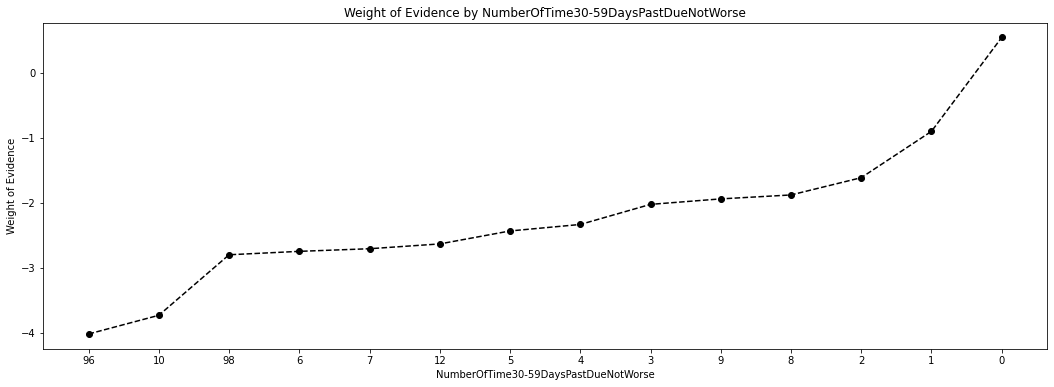

In [58]:
plot_by_woe(df_temp)

In [59]:
df_train_inputs['PastDue30-59:11-13-96-10'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([11,13,96,10]), 1, 0)
df_train_inputs['PastDue30-59:98-6-7-12'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([98,6,7,12]), 1, 0)
df_train_inputs['PastDue30-59:5-4'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([5,4]), 1, 0)
df_train_inputs['PastDue30-59:3'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([3]), 1, 0)
df_train_inputs['PastDue30-59:9-8'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([9,8]), 1, 0)
df_train_inputs['PastDue30-59:2'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([2]), 1, 0)
df_train_inputs['PastDue30-59:1'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([1]), 1, 0)
#df_train_inputs['PastDue30-59:0'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([5,4]), 1, 0)

In [60]:
df_test_inputs['PastDue30-59:11-13-96-10'] = np.where(df_test_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([11,13,96,10]), 1, 0)
df_test_inputs['PastDue30-59:98-6-7-12'] = np.where(df_test_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([98,6,7,12]), 1, 0)
df_test_inputs['PastDue30-59:5-4'] = np.where(df_test_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([5,4]), 1, 0)
df_test_inputs['PastDue30-59:3'] = np.where(df_test_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([3]), 1, 0)
df_test_inputs['PastDue30-59:9-8'] = np.where(df_test_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([9,8]), 1, 0)
df_test_inputs['PastDue30-59:2'] = np.where(df_test_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([2]), 1, 0)
df_test_inputs['PastDue30-59:1'] = np.where(df_test_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([1]), 1, 0)
#df_train_inputs['PastDue30-59:0'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([5,4]), 1, 0)

### FINE CLASSING AND COARSE CLASSING NUMBER OF DAYS PAST DUE 60 - 89

In [61]:
df_temp = woe_discrete(df_train_inputs, 'NumberOfTime60-89DaysPastDueNotWorse', df_train_target)
df_temp

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,NumberOfTime60-89DaysPastDueNotWorse,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,11,1,1.000000,0.000007,1.0,0.0,0.000000,0.000100,-inf,NaN,NaN,inf
1,96,5,0.800000,0.000033,4.0,1.0,0.000007,0.000399,-4.022569,0.200000,inf,0.001576
2,6,16,0.750000,0.000107,12.0,4.0,0.000029,0.001197,-3.734887,0.050000,0.287682,0.004364
3,4,105,0.619048,0.000700,65.0,40.0,0.000286,0.006483,-3.121783,0.130952,0.613104,0.019347
4,5,34,0.617647,0.000227,21.0,13.0,0.000093,0.002095,-3.115848,0.001401,0.005935,0.006237
5,3,318,0.566038,0.002120,180.0,138.0,0.000986,0.017953,-2.901978,0.051609,0.213870,0.049239
6,7,9,0.555556,0.000060,5.0,4.0,0.000029,0.000499,-2.859419,0.010482,0.042560,0.001344
7,98,264,0.541667,0.001760,143.0,121.0,0.000864,0.014263,-2.803329,0.013889,0.056089,0.037560
8,2,1118,0.501789,0.007453,561.0,557.0,0.003979,0.055955,-2.643431,0.039878,0.159898,0.137393
9,8,2,0.500000,0.000013,1.0,1.0,0.000007,0.000100,-2.636275,0.001789,0.007156,0.000244


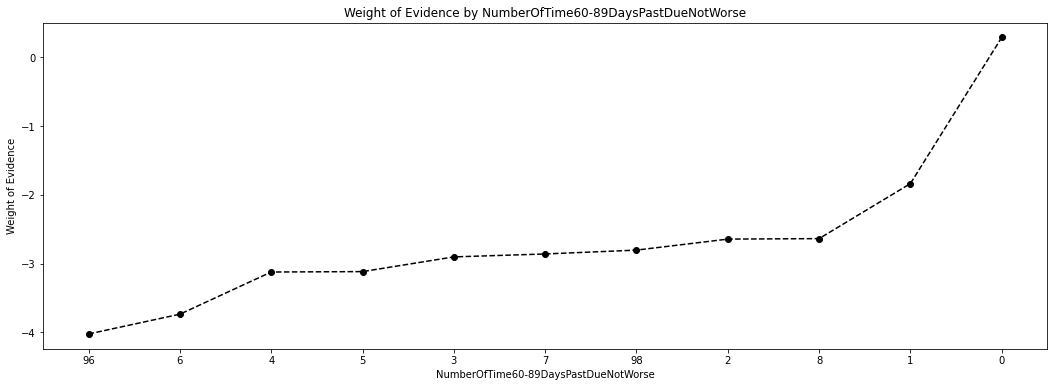

In [62]:
plot_by_woe(df_temp)

In [63]:
df_train_inputs['PastDue60-89:11-96-6-9'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([11,96,6,9]), 1, 0)
df_train_inputs['PastDue60-89:4-5'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([4,5]), 1, 0)
df_train_inputs['PastDue60-89:3-98'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([3, 98]), 1, 0)
df_train_inputs['PastDue60-89:7-8'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([7, 8]), 1, 0)
df_train_inputs['PastDue60-89:2'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([2]), 1, 0)
df_train_inputs['PastDue60-89:1'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([1]), 1, 0)
#df_train_inputs['PastDue60-89:0'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([0]), 1, 0)

In [64]:
df_test_inputs['PastDue60-89:11-96-6-9'] = np.where(df_test_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([11,96,6,9]), 1, 0)
df_test_inputs['PastDue60-89:4-5'] = np.where(df_test_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([4,5]), 1, 0)
df_test_inputs['PastDue60-89:3-98'] = np.where(df_test_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([3,98]), 1, 0)
df_test_inputs['PastDue60-89:7-8'] = np.where(df_test_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([7,8]), 1, 0)
df_test_inputs['PastDue60-89:2'] = np.where(df_test_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([2]), 1, 0)
df_test_inputs['PastDue60-89:1'] = np.where(df_test_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([1]), 1, 0)
#df_train_inputs['PastDue60-89:0'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([0]), 1, 0)

### FINE CLASSING AND COARSE CLASSING NUMBER OF DAYS PAST DUE 90

In [65]:
df_temp = woe_discrete(df_train_inputs, 'NumberOfTimes90DaysLate', df_train_target)
df_temp

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,NumberOfTimes90DaysLate,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,17,1,1.000000,0.000007,1.0,0.0,0.000000,0.000100,-inf,NaN,NaN,inf
1,7,38,0.815789,0.000253,31.0,7.0,0.000050,0.003092,-4.124352,0.184211,inf,0.012546
2,96,5,0.800000,0.000033,4.0,1.0,0.000007,0.000399,-4.022569,0.015789,0.101783,0.001576
3,9,19,0.736842,0.000127,14.0,5.0,0.000036,0.001396,-3.665894,0.063158,0.356675,0.004988
4,8,21,0.714286,0.000140,15.0,6.0,0.000043,0.001496,-3.552566,0.022556,0.113329,0.005163
5,4,291,0.670103,0.001940,195.0,96.0,0.000686,0.019449,-3.344926,0.044183,0.207639,0.062763
6,5,131,0.633588,0.000873,83.0,48.0,0.000343,0.008278,-3.183915,0.036515,0.161012,0.025266
7,10,8,0.625000,0.000053,5.0,3.0,0.000021,0.000499,-3.147101,0.008588,0.036814,0.001502
8,11,5,0.600000,0.000033,3.0,2.0,0.000014,0.000299,-3.041740,0.025000,0.105361,0.000867
9,6,80,0.600000,0.000533,48.0,32.0,0.000229,0.004788,-3.041740,0.000000,0.000000,0.013867


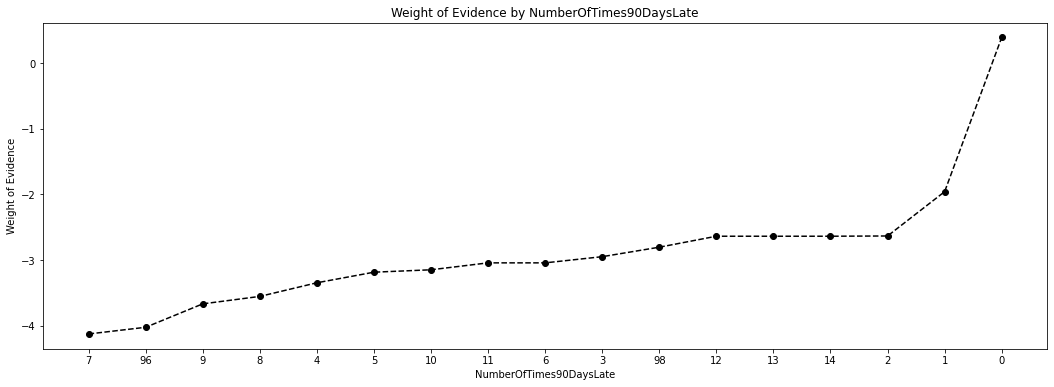

In [66]:
plot_by_woe(df_temp)

In [67]:
df_train_inputs['PastDue90:9-96-7-17-15-8'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([9,96,7,17,15,8]), 1, 0)
df_train_inputs['PastDue90:4-5'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([4,5]), 1, 0)
df_train_inputs['PastDue90:6-10-11'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([6,10,11]), 1, 0)
df_train_inputs['PastDue90:3-98'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([3,98]), 1, 0)
df_train_inputs['PastDue90:12-13-14'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([12,13,14]), 1, 0)
df_train_inputs['PastDue90:2'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([2]), 1, 0)
df_train_inputs['PastDue90:1'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([1]), 1, 0)
#df_train_inputs['PastDue90:0'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([0]), 1, 0)

In [68]:
df_test_inputs['PastDue90:9-96-7-17-15-8'] = np.where(df_test_inputs['NumberOfTimes90DaysLate'].isin([9,96,7,17,15,8]), 1, 0)
df_test_inputs['PastDue90:4-5'] = np.where(df_test_inputs['NumberOfTimes90DaysLate'].isin([4,5]), 1, 0)
df_test_inputs['PastDue90:6-10-11'] = np.where(df_test_inputs['NumberOfTimes90DaysLate'].isin([6,10,11]), 1, 0)
df_test_inputs['PastDue90:3-98'] = np.where(df_test_inputs['NumberOfTimes90DaysLate'].isin([3,98]), 1, 0)
df_test_inputs['PastDue90:12-13-14'] = np.where(df_test_inputs['NumberOfTimes90DaysLate'].isin([12,13,14]), 1, 0)
df_test_inputs['PastDue90:2'] = np.where(df_test_inputs['NumberOfTimes90DaysLate'].isin([2]), 1, 0)
df_test_inputs['PastDue90:1'] = np.where(df_test_inputs['NumberOfTimes90DaysLate'].isin([1]), 1, 0)
#df_train_inputs['PastDue90:0'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([0]), 1, 0)

## NUMBER OF DEPENDENTS

In [69]:
df_temp = woe_discrete(df_train_inputs, 'NumberOfDependents', df_train_target)
df_temp

,NumberOfDependents,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,6.0,158,0.151899,0.001053,24.0,134.0,0.000957,0.002394,-0.916489,NaN,NaN,0.001316
1,4.0,2862,0.103774,0.019080,297.0,2565.0,0.018325,0.029623,-0.480293,0.048125,0.436196,0.005426
2,7.0,51,0.098039,0.000340,5.0,46.0,0.000329,0.000499,-0.417071,0.005734,0.063222,0.000071
3,5.0,746,0.091153,0.004973,68.0,678.0,0.004844,0.006782,-0.336635,0.006886,0.080436,0.000653
4,3.0,9483,0.088263,0.063220,837.0,8646.0,0.061769,0.083483,-0.301247,0.002890,0.035388,0.006541
5,8.0,24,0.083333,0.000160,2.0,22.0,0.000157,0.000199,-0.238380,0.004930,0.062867,0.000010
6,2.0,19522,0.081139,0.130147,1584.0,17938.0,0.128152,0.157989,-0.209307,0.002194,0.029073,0.006245
7,1.0,26316,0.073529,0.175440,1935.0,24381.0,0.174182,0.192998,-0.102578,0.007610,0.106729,0.001930
8,0.0,90826,0.058067,0.605507,5274.0,85552.0,0.611199,0.526032,0.150060,0.015462,0.252638,0.012780
9,9.0,5,0.000000,0.000033,0.0,5.0,0.000036,0.000000,inf,0.058067,inf,inf


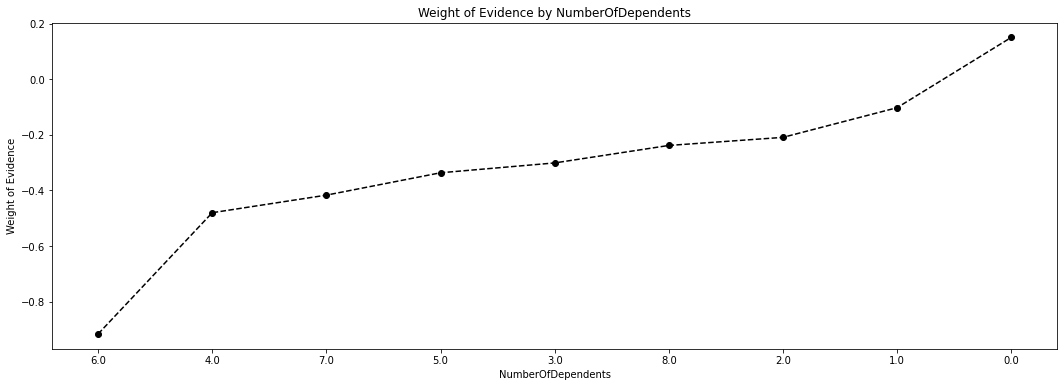

In [70]:
plot_by_woe(df_temp)

In [71]:
df_train_inputs['NumberOfDependents:>9'] = np.where(df_train_inputs['NumberOfDependents'].isin([9,10,13,20]), 1, 0)
df_train_inputs['NumberOfDependents:6'] = np.where(df_train_inputs['NumberOfDependents'].isin([6]), 1, 0)
df_train_inputs['NumberOfDependents:4'] = np.where(df_train_inputs['NumberOfDependents'].isin([4]), 1, 0)
df_train_inputs['NumberOfDependents:1'] = np.where(df_train_inputs['NumberOfDependents'].isin([1]), 1, 0)
df_train_inputs['NumberOfDependents:2'] = np.where(df_train_inputs['NumberOfDependents'].isin([2]), 1, 0)
df_train_inputs['NumberOfDependents:7'] = np.where(df_train_inputs['NumberOfDependents'].isin([7]), 1, 0)
df_train_inputs['NumberOfDependents:5'] = np.where(df_train_inputs['NumberOfDependents'].isin([5]), 1, 0)
df_train_inputs['NumberOfDependents:3'] = np.where(df_train_inputs['NumberOfDependents'].isin([3]), 1, 0)
df_train_inputs['NumberOfDependents:8'] = np.where(df_train_inputs['NumberOfDependents'].isin([8]), 1, 0)
#df_train_inputs['NumberOfDependents:0'] = np.where(df_train_inputs['NumberOfDependents'].isin([0]), 1, 0)

In [72]:
df_test_inputs['NumberOfDependents:>9'] = np.where(df_test_inputs['NumberOfDependents'].isin([9,10,13,20]), 1, 0)
df_test_inputs['NumberOfDependents:6'] = np.where(df_test_inputs['NumberOfDependents'].isin([6]), 1, 0)
df_test_inputs['NumberOfDependents:4'] = np.where(df_test_inputs['NumberOfDependents'].isin([4]), 1, 0)
df_test_inputs['NumberOfDependents:1'] = np.where(df_test_inputs['NumberOfDependents'].isin([1]), 1, 0)
df_test_inputs['NumberOfDependents:2'] = np.where(df_test_inputs['NumberOfDependents'].isin([2]), 1, 0)
df_test_inputs['NumberOfDependents:7'] = np.where(df_test_inputs['NumberOfDependents'].isin([7]), 1, 0)
df_test_inputs['NumberOfDependents:5'] = np.where(df_test_inputs['NumberOfDependents'].isin([5]), 1, 0)
df_test_inputs['NumberOfDependents:3'] = np.where(df_test_inputs['NumberOfDependents'].isin([3]), 1, 0)
df_test_inputs['NumberOfDependents:8'] = np.where(df_test_inputs['NumberOfDependents'].isin([8]), 1, 0)
#df_train_inputs['NumberOfDependents:0'] = np.where(df_train_inputs['NumberOfDependents'].isin([0]), 1, 0)

## MONTHLY INCOME

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

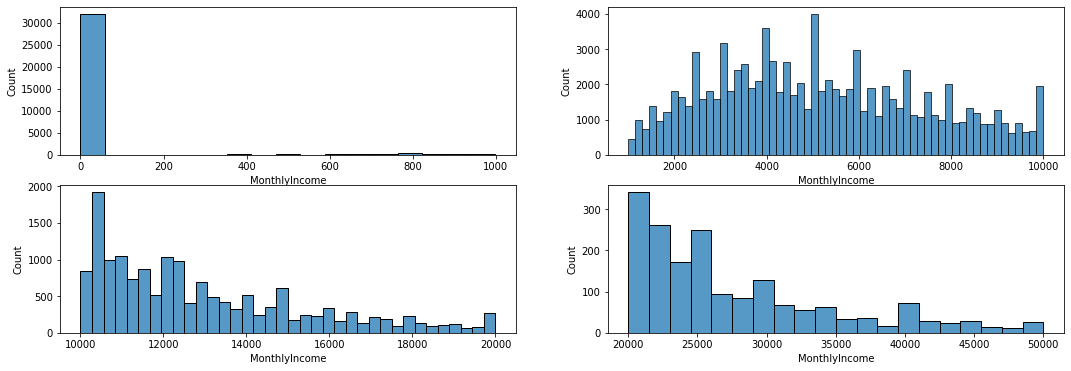

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(18,6))
sns.histplot(x = df_train[df_train['MonthlyIncome'] < 1000]['MonthlyIncome'], ax = axes[0,0])
sns.histplot(x = df_train[(df_train['MonthlyIncome'] > 1000) & 
                         (df_train['MonthlyIncome'] <= 10000)]['MonthlyIncome'], ax = axes[0,1])
sns.histplot(x = df_train[(df_train['MonthlyIncome'] > 10000) & 
                         (df_train['MonthlyIncome'] <= 20000)]['MonthlyIncome'], ax = axes[1,0])
sns.histplot(x = df_train[(df_train['MonthlyIncome'] > 20000) & 
                         (df_train['MonthlyIncome'] <= 50000)]['MonthlyIncome'], ax = axes[1,1])

In [74]:
bins = pd.IntervalIndex.from_tuples([(0, 1000)])
bins3 = pd.IntervalIndex.from_tuples([(10000, 12000), (12000, 14000), (14000, 16000), (16000, 20000)])
bins4 = pd.IntervalIndex.from_tuples([(20000, 30000), (30000, 50000)])
box1 = pd.cut(df_train[df_train['MonthlyIncome'] <= 1000]['MonthlyIncome'], bins)
box2 = pd.qcut(df_train[(df_train['MonthlyIncome'] > 1000) & 
                         (df_train['MonthlyIncome'] <= 10000)]['MonthlyIncome'], 4)
box3 = pd.cut(df_train[(df_train['MonthlyIncome'] > 10000) & 
                         (df_train['MonthlyIncome'] <= 20000)]['MonthlyIncome'], bins3)
box4 = pd.cut(df_train[(df_train['MonthlyIncome'] > 20000) & 
                         (df_train['MonthlyIncome'] <= 50000)]['MonthlyIncome'], bins4)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

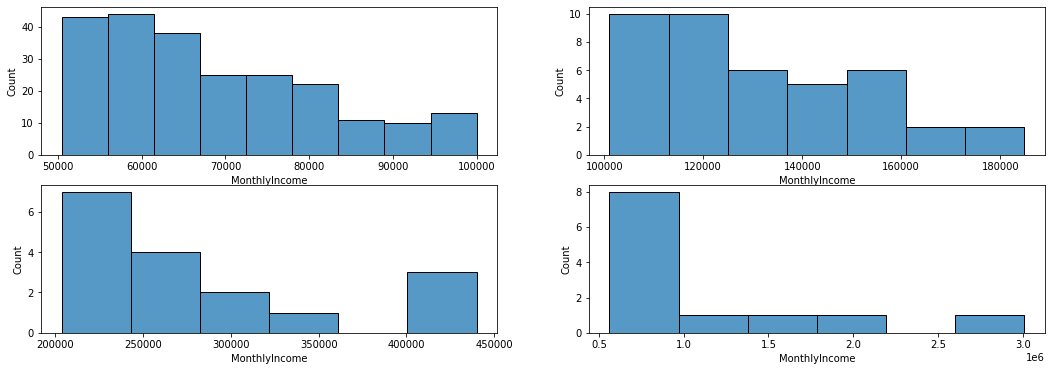

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(18,6))
sns.histplot(x = df_train[(df_train['MonthlyIncome'] > 50000) & 
                         (df_train['MonthlyIncome'] <= 100000)]['MonthlyIncome'], ax = axes[0,0])
sns.histplot(x = df_train[(df_train['MonthlyIncome'] > 100000) & 
                         (df_train['MonthlyIncome'] <= 200000)]['MonthlyIncome'], ax = axes[0,1])
sns.histplot(x = df_train[(df_train['MonthlyIncome'] > 200000) & 
                         (df_train['MonthlyIncome'] <= 500000)]['MonthlyIncome'], ax = axes[1,0])
sns.histplot(x = df_train[df_train['MonthlyIncome'] > 500000]['MonthlyIncome'], ax = axes[1,1])

In [76]:
bins5 = pd.IntervalIndex.from_tuples([(50000, 70000), (70000,100000), (100000, 140000), (140000, 200000), (200000, 500000),
                                     (500000, 3500000)])
box5 = pd.cut(df_train[df_train['MonthlyIncome'] > 50000]['MonthlyIncome'], bins5)

In [77]:
df_train_inputs['MonthlyIncome_x'] = df_train_inputs['MonthlyIncome'].values

In [78]:
df_train_inputs.loc[box1.index.values, 'MonthlyIncome_x'] = box1.values
df_train_inputs.loc[box2.index.values, 'MonthlyIncome_x'] = box2.values
df_train_inputs.loc[box3.index.values, 'MonthlyIncome_x'] = box3.values
df_train_inputs.loc[box4.index.values, 'MonthlyIncome_x'] = box4.values
df_train_inputs.loc[box5.index.values, 'MonthlyIncome_x'] = box5.values

In [79]:
df_temp = woe_continuous(df_train_inputs, 'MonthlyIncome_x', df_train_target)
df_temp

,MonthlyIncome_x,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.0, 1000.0]",3161,0.057260,0.026645,181.0,2980.0,0.027006,0.021831,0.212749,NaN,NaN,0.001101
1,"(1000.999, 3333.0]",24580,0.099837,0.207190,2454.0,22126.0,0.200518,0.295984,-0.389398,0.042577,0.602148,0.037174
2,"(3333.0, 5000.0]",26484,0.079746,0.223239,2112.0,24372.0,0.220873,0.254734,-0.142633,0.020091,0.246766,0.004830
3,"(5000.0, 6850.0]",21828,0.067528,0.183993,1474.0,20354.0,0.184460,0.177783,0.036865,0.012218,0.179498,0.000246
4,"(6850.0, 10000.0]",24263,0.052673,0.204518,1278.0,22985.0,0.208303,0.154143,0.301113,0.014855,0.264248,0.016308
5,"(10000.0, 12000.0]",7577,0.039989,0.063868,303.0,7274.0,0.065921,0.036546,0.589897,0.012683,0.288783,0.017328
6,"(12000.0, 14000.0]",4046,0.041275,0.034105,167.0,3879.0,0.035154,0.020142,0.556907,0.001286,0.032990,0.008360
7,"(14000.0, 16000.0]",2344,0.048208,0.019758,113.0,2231.0,0.020219,0.013629,0.394385,0.006933,0.162521,0.002599
8,"(16000.0, 20000.0]",2249,0.043130,0.018957,97.0,2152.0,0.019503,0.011699,0.511010,0.005078,0.116625,0.003988
9,"(20000.0, 30000.0]",1311,0.053394,0.011051,70.0,1241.0,0.011247,0.008443,0.286745,0.010264,0.224264,0.000804


In [80]:
df_train_inputs['MonthlyIncome:0-200'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(0, 200)), 1, 0)
df_train_inputs['MonthlyIncome:200-1000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(200, 1000)), 1, 0)
df_train_inputs['MonthlyIncome:1000-3500'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(1000, 3500)), 1, 0)
df_train_inputs['MonthlyIncome:3500-5000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(3500, 5000)), 1, 0)
#df_train_inputs['MonthlyIncome:5000-6850'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(5000, 6850)), 1, 0)
df_train_inputs['MonthlyIncome:6850-10000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(6850, 10000)), 1, 0)
df_train_inputs['MonthlyIncome:10000-12000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(10000, 12000)), 1, 0)
df_train_inputs['MonthlyIncome:12000-16000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(12000, 16000)), 1, 0)
df_train_inputs['MonthlyIncome:16000-30000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(16000, 30000)), 1, 0)
df_train_inputs['MonthlyIncome:30000-70000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(30000, 70000)), 1, 0)
df_train_inputs['MonthlyIncome:70000-100000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(70000, 100000)), 1, 0)
df_train_inputs['MonthlyIncome:100000-140000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(100000, 140000)), 1, 0)
df_train_inputs['MonthlyIncome:140000-500000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(140000, 500000)), 1, 0)
df_train_inputs['MonthlyIncome:>500000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(500000, int(df_train_inputs['MonthlyIncome'].max()))), 1, 0)

In [81]:
df_test_inputs['MonthlyIncome:0-200'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(0, 200)), 1, 0)
df_test_inputs['MonthlyIncome:200-1000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(200, 1000)), 1, 0)
df_test_inputs['MonthlyIncome:1000-3500'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(1000, 3500)), 1, 0)
df_test_inputs['MonthlyIncome:3500-5000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(3500, 5000)), 1, 0)
#df_test_inputs['MonthlyIncome:5000-6850'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(5000, 6850)), 1, 0)
df_test_inputs['MonthlyIncome:6850-10000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(6850, 10000)), 1, 0)
df_test_inputs['MonthlyIncome:10000-12000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(10000, 12000)), 1, 0)
df_test_inputs['MonthlyIncome:12000-16000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(12000, 16000)), 1, 0)
df_test_inputs['MonthlyIncome:16000-30000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(16000, 30000)), 1, 0)
df_test_inputs['MonthlyIncome:30000-70000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(30000, 70000)), 1, 0)
df_test_inputs['MonthlyIncome:70000-100000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(70000, 100000)), 1, 0)
df_test_inputs['MonthlyIncome:100000-140000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(100000, 140000)), 1, 0)
df_test_inputs['MonthlyIncome:140000-500000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(140000, 500000)), 1, 0)
df_test_inputs['MonthlyIncome:>500000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(500000, int(df_test_inputs['MonthlyIncome'].max()))), 1, 0)

## DEBT RATIO

<AxesSubplot:xlabel='DebtRatio', ylabel='Count'>

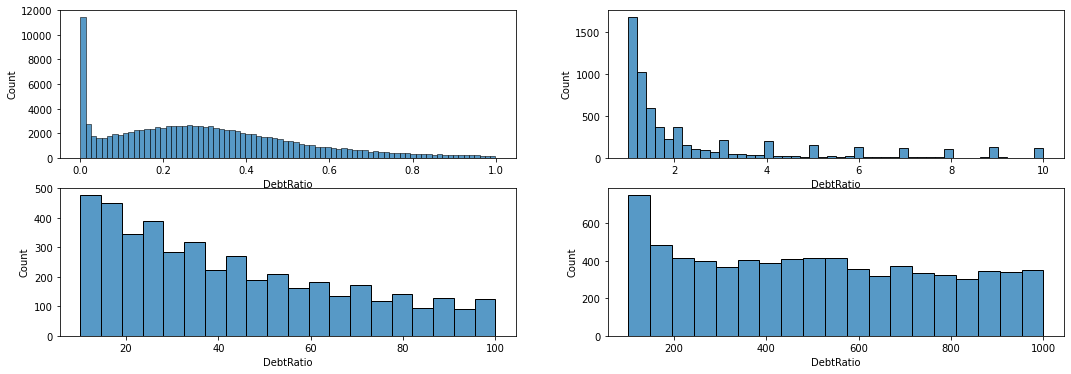

In [82]:
#Train_Dataset Boxplot
fig, axes = plt.subplots(2, 2, figsize=(18,6))
sns.histplot(x = df_train[df_train['DebtRatio'] < 1]['DebtRatio'],
            ax = axes[0,0])
sns.histplot(x = df_train[(df_train['DebtRatio'] > 1) & 
                        (df_train['DebtRatio'] <= 10)]['DebtRatio'],
            ax = axes[0,1])
sns.histplot(x = df_train[(df_train['DebtRatio'] > 10) & 
                        (df_train['DebtRatio'] <= 100)]['DebtRatio'],
            ax = axes[1,0])
sns.histplot(x = df_train[(df_train['DebtRatio'] > 100) & 
                        (df_train['DebtRatio'] <= 1000)]['DebtRatio'],
            ax = axes[1,1])

<AxesSubplot:xlabel='DebtRatio', ylabel='Count'>

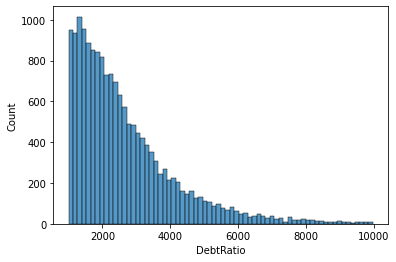

In [83]:
sns.histplot(x = df_train[(df_train['DebtRatio'] > 1000) & 
                        (df_train['DebtRatio'] <= 10000)]['DebtRatio'])

In [84]:
bins = pd.IntervalIndex.from_tuples([(1, 10), (10, 100), (100, 1000), (1000, int(df_train_inputs['DebtRatio'].max()))])
box1 = pd.qcut(df_train[df_train['DebtRatio'] <= 1]['DebtRatio'], 10)
box2 = pd.cut(df_train[df_train['DebtRatio'] > 1]['DebtRatio'], bins)

In [85]:
df_train_inputs['DebtRatio_x'] = df_train_inputs['DebtRatio'].values

In [86]:
df_train_inputs.loc[box1.index.values, 'DebtRatio_x'] = box1.values
df_train_inputs.loc[box2.index.values, 'DebtRatio_x'] = box2.values

In [87]:
df_temp = woe_continuous(df_train_inputs, 'DebtRatio_x', df_train_target)
df_temp

,DebtRatio_x,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 0.0129]",11487,0.051972,0.076580,597.0,10890.0,0.077800,0.059545,0.267408,NaN,NaN,4.881530e-03
1,"(0.0129, 0.0897]",11486,0.067038,0.076573,770.0,10716.0,0.076557,0.076800,-0.003172,0.015066,0.270580,7.716332e-07
2,"(0.0897, 0.159]",11486,0.064078,0.076573,736.0,10750.0,0.076800,0.073409,0.045156,0.002960,0.048328,1.531166e-04
3,"(0.159, 0.218]",11486,0.059812,0.076573,687.0,10799.0,0.077150,0.068522,0.118600,0.004266,0.073444,1.023301e-03
4,"(0.218, 0.275]",11487,0.052929,0.076580,608.0,10879.0,0.077722,0.060642,0.248140,0.006883,0.129540,4.238040e-03
5,"(0.275, 0.333]",11486,0.053979,0.076573,620.0,10866.0,0.077629,0.061839,0.227399,0.001049,0.020740,3.590521e-03
6,"(0.333, 0.399]",11486,0.062250,0.076573,715.0,10771.0,0.076950,0.071315,0.076055,0.008271,0.151344,4.286027e-04
7,"(0.399, 0.483]",11486,0.069563,0.076573,799.0,10687.0,0.076350,0.079693,-0.042853,0.007313,0.118908,1.432521e-04
8,"(0.483, 0.621]",11486,0.086018,0.076573,988.0,10498.0,0.075000,0.098544,-0.273018,0.016455,0.230165,6.427966e-03
9,"(0.621, 1.0]",11487,0.105772,0.076580,1215.0,10272.0,0.073385,0.121185,-0.501597,0.019754,0.228580,2.397628e-02


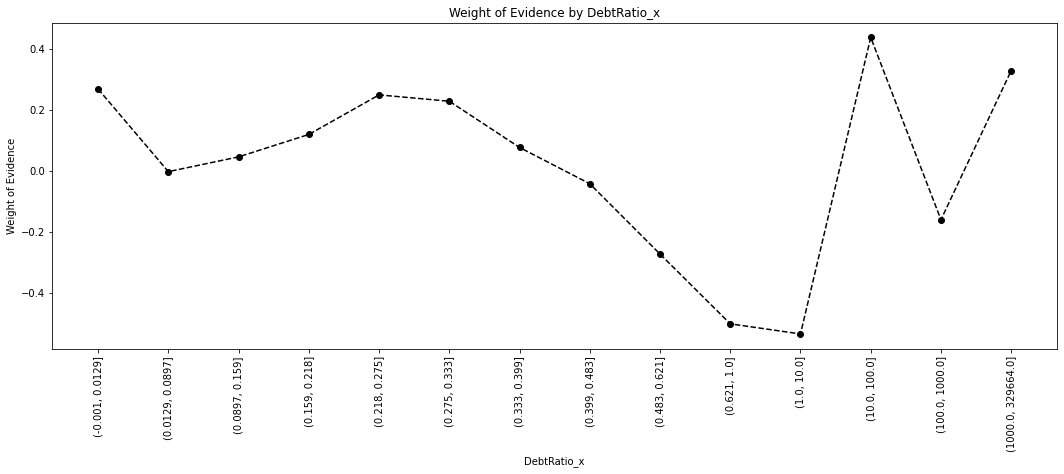

In [88]:
plot_by_woe(df_temp, 90)

In [89]:
df_train_inputs['DebtRatio:<0.0129'] = np.where(round(df_train_inputs['DebtRatio'], 3).isin(np.arange(0.0, 0.0129, 0.001)), 1, 0)
#df_train_inputs['DebtRatio:<0.159'] = np.where(round(df_train_inputs['DebtRatio'], 4).isin(np.arange(0.0129, 0.159, 0.001)), 1, 0)
df_train_inputs['DebtRatio:<0.218'] = np.where(round(df_train_inputs['DebtRatio'], 3).isin(np.arange(0.159, 0.218, 0.001)), 1, 0)
df_train_inputs['DebtRatio:<0.333'] = np.where(round(df_train_inputs['DebtRatio'], 3).isin(np.arange(0.218, 0.333, 0.001)), 1, 0)
df_train_inputs['DebtRatio:<0.483'] = np.where(round(df_train_inputs['DebtRatio'], 3).isin(np.arange(0.333, 0.483, 0.001)), 1, 0)
df_train_inputs['DebtRatio:<0.621'] = np.where(round(df_train_inputs['DebtRatio'], 3).isin(np.arange(0.483, 0.621, 0.001)), 1, 0)
df_train_inputs['DebtRatio:<1'] = np.where(round(df_train_inputs['DebtRatio'], 3).isin(np.arange(0.621, 1, 0.001)), 1, 0)
df_train_inputs['DebtRatio:<10'] = np.where(round(df_train_inputs['DebtRatio'], 0).isin(range(1, 10)), 1, 0)
df_train_inputs['DebtRatio:<100'] = np.where(round(df_train_inputs['DebtRatio'], 0).isin(range(10, 100)), 1, 0)
df_train_inputs['DebtRatio:<1000'] = np.where(round(df_train_inputs['DebtRatio'], 0).isin(range(100, 1000)), 1, 0)
df_train_inputs['DebtRatio:>1000'] = np.where((df_train_inputs['DebtRatio'] > 1000), 1, 0)

In [90]:
df_test_inputs['DebtRatio:<0.0129'] = np.where(round(df_test_inputs['DebtRatio'], 3).isin(np.arange(0.0, 0.0129, 0.001)), 1, 0)
#df_test_inputs['DebtRatio:<0.159'] = np.where(round(df_test_inputs['DebtRatio'], 4).isin(np.arange(0.0129, 0.159, 0.001)), 1, 0)
df_test_inputs['DebtRatio:<0.218'] = np.where(round(df_test_inputs['DebtRatio'], 3).isin(np.arange(0.159, 0.218, 0.001)), 1, 0)
df_test_inputs['DebtRatio:<0.333'] = np.where(round(df_test_inputs['DebtRatio'], 3).isin(np.arange(0.218, 0.333, 0.001)), 1, 0)
df_test_inputs['DebtRatio:<0.483'] = np.where(round(df_test_inputs['DebtRatio'], 3).isin(np.arange(0.333, 0.483, 0.001)), 1, 0)
df_test_inputs['DebtRatio:<0.621'] = np.where(round(df_test_inputs['DebtRatio'], 3).isin(np.arange(0.483, 0.621, 0.001)), 1, 0)
df_test_inputs['DebtRatio:<1'] = np.where(round(df_test_inputs['DebtRatio'], 3).isin(np.arange(0.621, 1, 0.001)), 1, 0)
df_test_inputs['DebtRatio:<10'] = np.where(round(df_test_inputs['DebtRatio'], 0).isin(range(1, 10)), 1, 0)
df_test_inputs['DebtRatio:<100'] = np.where(round(df_test_inputs['DebtRatio'], 0).isin(range(10, 100)), 1, 0)
df_test_inputs['DebtRatio:<1000'] = np.where(round(df_test_inputs['DebtRatio'], 0).isin(range(100, 1000)), 1, 0)
df_test_inputs['DebtRatio:>1000'] = np.where((df_test_inputs['DebtRatio'] > 1000), 1, 0)

## CREDIT UTILIZATION RATIO

<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines', ylabel='Count'>

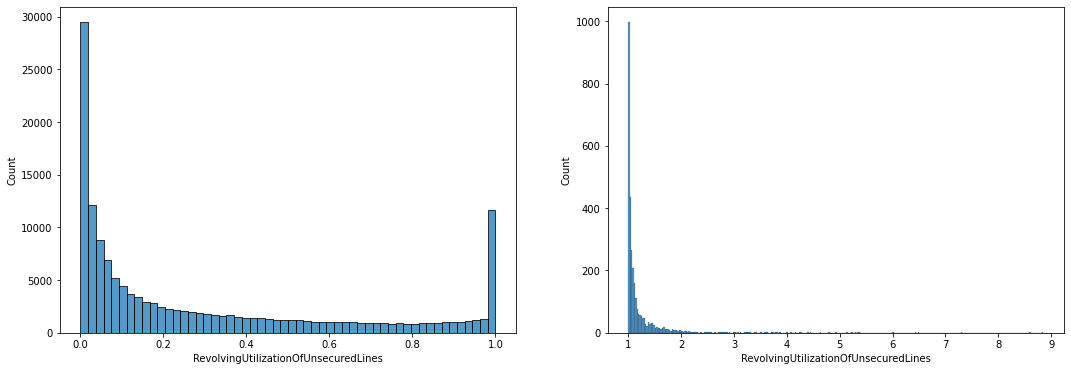

In [91]:
#Train_Dataset Boxplot
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.histplot(x = df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] < 1]['RevolvingUtilizationOfUnsecuredLines'],
            ax = axes[0])
sns.histplot(x = df_train[(df_train['RevolvingUtilizationOfUnsecuredLines'] > 1) & 
                        (df_train['RevolvingUtilizationOfUnsecuredLines'] <= 10)]['RevolvingUtilizationOfUnsecuredLines'],
            ax = axes[1])

In [92]:
#bins = pd.IntervalIndex.from_tuples([(1, 10), (10, 100), (100, 1000), (1000, int(df_train_inputs['RevolvingUtilizationOfUnsecuredLines'].max()))])
box1 = pd.cut(df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] <= 1]['RevolvingUtilizationOfUnsecuredLines'], 50)
box2 = pd.cut(df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] > 1]['RevolvingUtilizationOfUnsecuredLines'], 10)

In [93]:
df_train_inputs['RevolvingUtilizationOfUnsecuredLines_x'] = df_train_inputs['RevolvingUtilizationOfUnsecuredLines'].values

In [94]:
df_train_inputs.loc[box1.index.values, 'RevolvingUtilizationOfUnsecuredLines_x'] = box1.values
df_train_inputs.loc[box2.index.values, 'RevolvingUtilizationOfUnsecuredLines_x'] = box2.values

In [95]:
df_temp = woe_continuous(df_train_inputs, 'RevolvingUtilizationOfUnsecuredLines_x', df_train_target)
df_temp

,RevolvingUtilizationOfUnsecuredLines_x,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-49.707, 5071.7]",3274,0.377214,0.021827,1235.0,2039.0,0.014567,0.123180,-2.134886,NaN,NaN,2.318759e-01
1,"(-0.001, 0.02]",30655,0.019149,0.204367,587.0,30068.0,0.214811,0.058548,1.299917,0.358066,3.434803,2.031296e-01
2,"(0.02, 0.04]",12516,0.013902,0.083440,174.0,12342.0,0.088174,0.017355,1.625433,0.005246,0.325516,1.151110e-01
3,"(0.04, 0.06]",9150,0.016831,0.061000,154.0,8996.0,0.064269,0.015360,1.431308,0.002928,0.194125,7.000385e-02
4,"(0.06, 0.08]",6748,0.022525,0.044987,152.0,6596.0,0.047123,0.015161,1.134063,0.005695,0.297245,3.624744e-02
5,"(0.08, 0.1]",5335,0.018557,0.035567,99.0,5236.0,0.037407,0.009874,1.331918,0.003968,0.197855,3.667120e-02
6,"(0.1, 0.12]",4385,0.022349,0.029233,98.0,4287.0,0.030627,0.009775,1.142100,0.003792,0.189818,2.381568e-02
7,"(0.12, 0.14]",3770,0.025199,0.025133,95.0,3675.0,0.026255,0.009475,1.019157,0.002850,0.122943,1.710095e-02
8,"(0.14, 0.16]",3385,0.032496,0.022567,110.0,3275.0,0.023397,0.010971,0.757318,0.007297,0.261839,9.410225e-03
9,"(0.16, 0.18]",3046,0.030532,0.020307,93.0,2953.0,0.021097,0.009276,0.821702,0.001964,0.064385,9.713256e-03


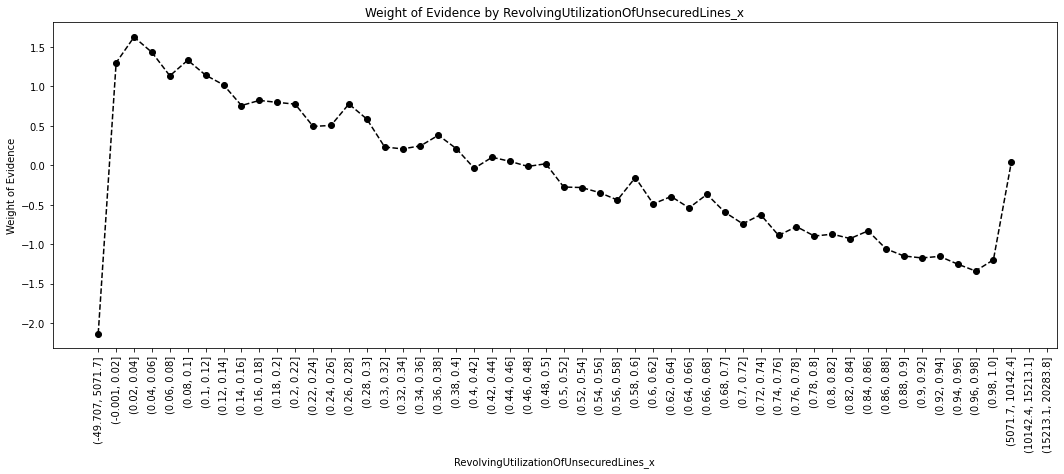

In [96]:
plot_by_woe(df_temp, 90)

In [97]:
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:<0.0004'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] < 0.0004), 1, 0)
#df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.0004-0.05_REF'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] >= 0.0004) & (train['RevolvingUtilizationOfUnsecuredLines'] < 0.05) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.05-0.1'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.05) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.1) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.1-0.2'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.1) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.2) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.2-0.3'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.2) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.3) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.3-0.4'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.3) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.4) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.4-0.6'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.4) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.6) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.6-0.8'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.6) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.8) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.8-1.0'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.8) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 1.0) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:1-10'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 1) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 10) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:>10'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 10) , 1, 0)

In [98]:
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:<0.0004'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] < 0.0004), 1, 0)
#df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.0004-0.05_REF'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] >= 0.0004) & (train['RevolvingUtilizationOfUnsecuredLines'] < 0.05) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:0.05-0.1'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.05) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] < 0.1) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:0.1-0.2'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.1) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.2) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:0.2-0.3'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.2) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.3) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:0.3-0.4'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.3) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.4) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:0.4-0.6'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.4) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.6) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:0.6-0.8'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.6) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.8) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:0.8-1.0'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.8) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 1.0) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:1-10'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 1) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 10) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:>10'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 10) , 1, 0)

## NUMBER OF OPEN CREDIT LINES AND LOANS

In [99]:
df_temp = woe_continuous(df_train_inputs, 'NumberOfOpenCreditLinesAndLoans', df_train_target)
df_temp

,NumberOfOpenCreditLinesAndLoans,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,1888,0.256356,0.012587,484.0,1404.0,0.010030,0.048274,-1.571279,NaN,NaN,6.009209e-02
1,1,4438,0.131816,0.029587,585.0,3853.0,0.027527,0.058348,-0.751279,0.124540,0.820000,2.315575e-02
2,2,6666,0.091359,0.044440,609.0,6057.0,0.043272,0.060742,-0.339123,0.040457,0.412156,5.924399e-03
3,3,9058,0.075293,0.060387,682.0,8376.0,0.059840,0.068023,-0.128179,0.016067,0.210944,1.048946e-03
4,4,11609,0.064002,0.077393,743.0,10866.0,0.077629,0.074107,0.046423,0.011290,0.174602,1.634728e-04
5,5,12931,0.063336,0.086207,819.0,12112.0,0.086530,0.081688,0.057593,0.000666,0.011170,2.789077e-04
6,6,13614,0.055384,0.090760,754.0,12860.0,0.091874,0.075204,0.200210,0.007952,0.142617,3.337442e-03
7,7,13245,0.056399,0.088300,747.0,12498.0,0.089288,0.074506,0.180984,0.001014,0.019226,2.675252e-03
8,8,12562,0.048241,0.083747,606.0,11956.0,0.085416,0.060443,0.345834,0.008158,0.164850,8.636507e-03
9,9,11355,0.058476,0.075700,664.0,10691.0,0.076378,0.066228,0.142600,0.010236,0.203233,1.447489e-03


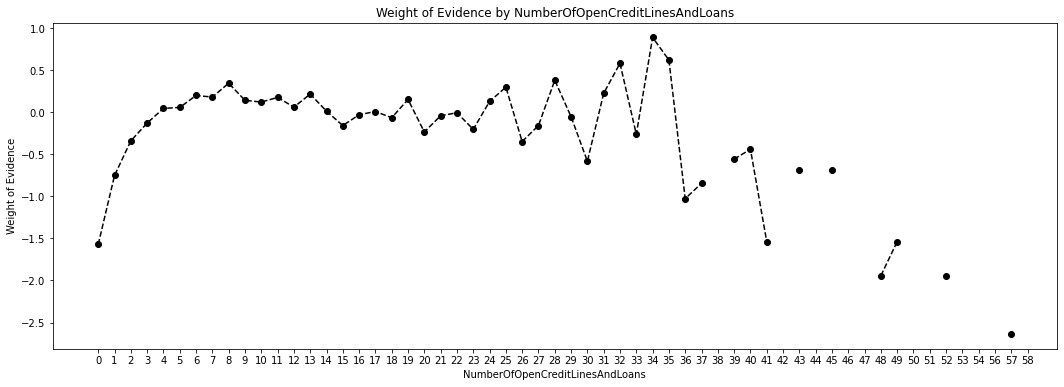

In [100]:
plot_by_woe(df_temp)

In [101]:
df_train_inputs['NumberOfOpenCreditLinesAndLoans:0'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin([0]), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:1'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin([1]), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:2'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin([2]), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:3'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin([3]), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:4-6'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(4, 6)), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:6-8'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(6, 8)), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:9-13'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(9, 13)), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:13'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin([13]), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:14-18'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(14, 18)), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:19'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin([19]), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:20-24'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(20, 24)), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:24-26'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(24, 27)), 1, 0)
#df_train_inputs['NumberOfOpenCreditLinesAndLoans:>26_REF'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(27, int(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].max()))), 1, 0)

In [102]:
df_test_inputs['NumberOfOpenCreditLinesAndLoans:0'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin([0]), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:1'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin([1]), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:2'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin([2]), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:3'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin([3]), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:4-6'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(4, 6)), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:6-8'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(6, 8)), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:9-13'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(9, 13)), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:13'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin([13]), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:14-18'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(14, 18)), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:19'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin([19]), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:20-24'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(20, 24)), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:24-26'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(24, 27)), 1, 0)
#df_train_inputs['NumberOfOpenCreditLinesAndLoans:>26_REF'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(27, int(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].max()))), 1, 0)

## NUMBER OF REAL ESTATE LOANS AND LINES

In [103]:
df_temp = woe_continuous(df_train_inputs, 'NumberRealEstateLoansOrLines', df_train_target)
df_temp

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,NumberRealEstateLoansOrLines,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,56188,0.083149,0.374587,4672.0,51516.0,0.368040,0.465988,-0.235970,NaN,NaN,2.311292e-02
1,1,52338,0.052505,0.348920,2748.0,49590.0,0.354280,0.274087,0.256641,0.030645,4.926106e-01,2.058072e-02
2,2,31522,0.055993,0.210147,1765.0,29757.0,0.212589,0.176042,0.188639,0.003488,6.800212e-02,6.894216e-03
3,3,6300,0.066984,0.042000,422.0,5878.0,0.041994,0.042091,-0.002308,0.010991,1.909472e-01,2.240374e-07
4,4,2170,0.089401,0.014467,194.0,1976.0,0.014117,0.019350,-0.315303,0.022417,3.129948e-01,1.649914e-03
5,5,689,0.120464,0.004593,83.0,606.0,0.004329,0.008278,-0.648236,0.031064,3.329323e-01,2.559948e-03
6,6,320,0.150000,0.002133,48.0,272.0,0.001943,0.004788,-0.901674,0.029536,2.534383e-01,2.564662e-03
7,7,171,0.181287,0.001140,31.0,140.0,0.001000,0.003092,-1.128620,0.031287,2.269458e-01,2.360819e-03
8,8,93,0.247312,0.000620,23.0,70.0,0.000500,0.002294,-1.523274,0.066025,3.946542e-01,2.732666e-03
9,9,78,0.179487,0.000520,14.0,64.0,0.000457,0.001396,-1.116449,0.067825,4.068247e-01,1.048504e-03


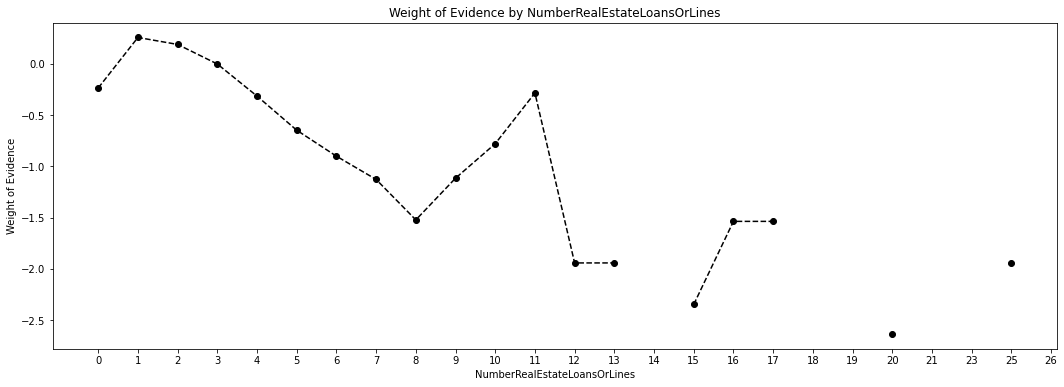

In [104]:
plot_by_woe(df_temp)

In [105]:
df_train_inputs['NumberRealEstateLoansOrLines:0'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([0]), 1, 0)
df_train_inputs['NumberRealEstateLoansOrLines:1'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([1]), 1, 0)
df_train_inputs['NumberRealEstateLoansOrLines:2'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([2]), 1, 0)
df_train_inputs['NumberRealEstateLoansOrLines:3'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([3]), 1, 0)
df_train_inputs['NumberRealEstateLoansOrLines:4'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([4]), 1, 0)
df_train_inputs['NumberRealEstateLoansOrLines:5'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([5]), 1, 0)
df_train_inputs['NumberRealEstateLoansOrLines:6'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([6]), 1, 0)
df_train_inputs['NumberRealEstateLoansOrLines:7'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([7]), 1, 0)
#df_train_inputs['NumberRealEstateLoansOrLines:>7_REF'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin(range(8, int(df_train_inputs['NumberRealEstateLoansOrLines'].max()))), 1, 0)

In [106]:
df_test_inputs['NumberRealEstateLoansOrLines:0'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([0]), 1, 0)
df_test_inputs['NumberRealEstateLoansOrLines:1'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([1]), 1, 0)
df_test_inputs['NumberRealEstateLoansOrLines:2'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([2]), 1, 0)
df_test_inputs['NumberRealEstateLoansOrLines:3'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([3]), 1, 0)
df_test_inputs['NumberRealEstateLoansOrLines:4'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([4]), 1, 0)
df_test_inputs['NumberRealEstateLoansOrLines:5'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([5]), 1, 0)
df_test_inputs['NumberRealEstateLoansOrLines:6'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([6]), 1, 0)
df_test_inputs['NumberRealEstateLoansOrLines:7'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([7]), 1, 0)
#df_train_inputs['NumberRealEstateLoansOrLines:>7_REF'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin(range(8, int(df_test_inputs['NumberRealEstateLoansOrLines'].max()))), 1, 0)

## AGE

In [107]:
#fine classing age feature into 30 categories
bins=np.linspace(df_train_inputs['age'].min(), df_train_inputs['age'].max()+1, 30)
df_train_inputs['age_x'] = pd.cut(df_train_inputs['age'], bins=bins, include_lowest=True, precision=0)

In [108]:
df_temp = woe_continuous(df_train_inputs, 'age_x', df_train_target)
df_temp

,age_x,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(17.0, 21.0]",184,0.070652,0.001227,13.0,171.0,0.001222,0.001297,-0.059561,NaN,NaN,0.000004
1,"(21.0, 24.0]",1891,0.107879,0.012607,204.0,1687.0,0.012052,0.020347,-0.523688,0.037227,0.464127,0.004344
2,"(24.0, 28.0]",3484,0.124569,0.023227,434.0,3050.0,0.021790,0.043287,-0.686423,0.016690,0.162735,0.014757
3,"(28.0, 31.0]",5199,0.114060,0.034660,593.0,4606.0,0.032906,0.059146,-0.586354,0.010509,0.100068,0.015386
4,"(31.0, 34.0]",6327,0.110005,0.042180,696.0,5631.0,0.040229,0.069420,-0.545582,0.004056,0.040772,0.015926
5,"(34.0, 37.0]",9301,0.098377,0.062007,915.0,8386.0,0.059911,0.091263,-0.420880,0.011628,0.124702,0.013195
6,"(37.0, 40.0]",8711,0.089427,0.058073,779.0,7932.0,0.056668,0.077698,-0.315626,0.008949,0.105255,0.006638
7,"(40.0, 43.0]",9412,0.091266,0.062747,859.0,8553.0,0.061104,0.085677,-0.338007,0.001839,0.022381,0.008306
8,"(43.0, 47.0]",10510,0.080875,0.070067,850.0,9660.0,0.069013,0.084780,-0.205762,0.010391,0.132244,0.003244
9,"(47.0, 50.0]",11362,0.079651,0.075747,905.0,10457.0,0.074707,0.090265,-0.189183,0.001224,0.016579,0.002943


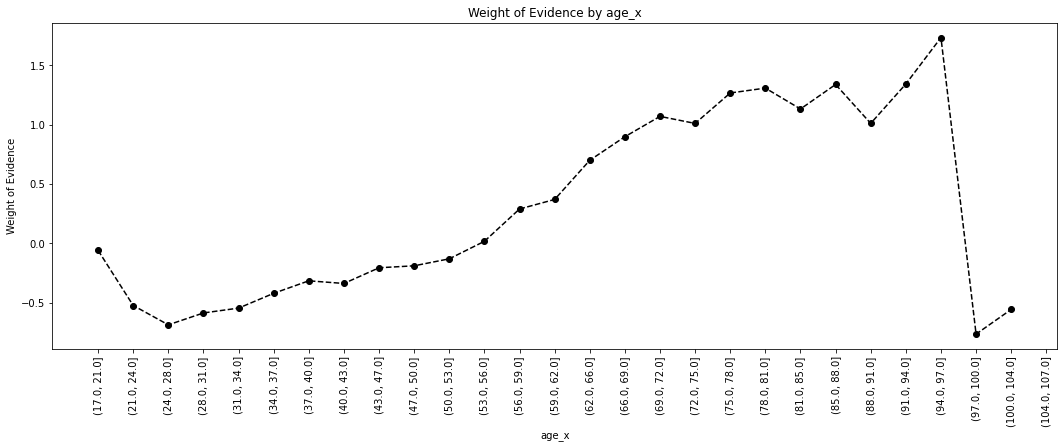

In [109]:
plot_by_woe(df_temp, 90)

In [110]:
df_train_inputs['age:<24'] = np.where(df_train_inputs['age'].isin(range(24)), 1, 0)
df_train_inputs['age:24-33'] = np.where(df_train_inputs['age'].isin(range(24, 33)), 1, 0)
df_train_inputs['age:33-36'] = np.where(df_train_inputs['age'].isin(range(33, 36)), 1, 0)
df_train_inputs['age:36-42'] = np.where(df_train_inputs['age'].isin(range(36, 42)), 1, 0)
df_train_inputs['age:42-55'] = np.where(df_train_inputs['age'].isin(range(42, 55)), 1, 0)
df_train_inputs['age:55-58'] = np.where(df_train_inputs['age'].isin(range(55, 58)), 1, 0)
df_train_inputs['age:58-64'] = np.where(df_train_inputs['age'].isin(range(58, 64)), 1, 0)
df_train_inputs['age:64-67'] = np.where(df_train_inputs['age'].isin(range(64, 67)), 1, 0)
df_train_inputs['age:67-70'] = np.where(df_train_inputs['age'].isin(range(67, 70)), 1, 0)
df_train_inputs['age:70-73'] = np.where(df_train_inputs['age'].isin(range(70, 73)), 1, 0)
df_train_inputs['age:73-89'] = np.where(df_train_inputs['age'].isin(range(73, 89)), 1, 0)
#df_train_inputs['age:>89_REF'] = np.where(df_test_inputs['age'].isin(range(89, int(df_train_inputs['age'].max()))), 1, 0)

In [111]:
df_test_inputs['age:<24'] = np.where(df_test_inputs['age'].isin(range(24)), 1, 0)
df_test_inputs['age:24-33'] = np.where(df_test_inputs['age'].isin(range(24, 33)), 1, 0)
df_test_inputs['age:33-36'] = np.where(df_test_inputs['age'].isin(range(33, 36)), 1, 0)
df_test_inputs['age:36-42'] = np.where(df_test_inputs['age'].isin(range(36, 42)), 1, 0)
df_test_inputs['age:42-55'] = np.where(df_test_inputs['age'].isin(range(42, 55)), 1, 0)
df_test_inputs['age:55-58'] = np.where(df_test_inputs['age'].isin(range(55, 58)), 1, 0)
df_test_inputs['age:58-64'] = np.where(df_test_inputs['age'].isin(range(58, 64)), 1, 0)
df_test_inputs['age:64-67'] = np.where(df_test_inputs['age'].isin(range(64, 67)), 1, 0)
df_test_inputs['age:67-70'] = np.where(df_test_inputs['age'].isin(range(67, 70)), 1, 0)
df_test_inputs['age:70-73'] = np.where(df_test_inputs['age'].isin(range(70, 73)), 1, 0)
df_test_inputs['age:73-89'] = np.where(df_test_inputs['age'].isin(range(73, 89)), 1, 0)
#df_test_inputs['age:>89_REF'] = np.where(df_test_inputs['age'].isin(range(89, int(df_test_inputs['age'].max()))), 1, 0)

In [112]:
#original feature categories in a list
original_features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 
                     'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 
                     'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 
                     'NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines',
                     'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

In [113]:
woe_train_inputs = df_train_inputs.copy()
woe_test_inputs = df_test_inputs.copy()

In [114]:
for col in df_train_inputs:
    if col not in original_features:
        df_train_inputs.drop(col, axis = 1, inplace = True)

In [115]:
for col in df_test_inputs:
    if col not in original_features:
        df_test_inputs.drop(col, axis = 1, inplace = True)

In [116]:
fine_class = ['MonthlyIncome_x', 'DebtRatio_x', 'RevolvingUtilizationOfUnsecuredLines_x', 'age_x']
other_ref_columns = ['MonthlyIncome:5000-6850', 'DebtRatio:<0.159', 'PastDue30-59:0', 'PastDue60-89:0',
                    'PastDue90:0', 'NumberOfDependents:0', 'RevolvingUtilizationOfUnsecuredLines:0.0004-0.05_REF',
                    'NumberOfOpenCreditLinesAndLoans:>26_REF', 'NumberRealEstateLoansOrLines:>7_REF', 'age:>89_REF']
to_drop = original_features + fine_class + other_ref_columns

In [117]:
for col in to_drop:
    if col in woe_train_inputs.columns.values:
        woe_train_inputs.drop(col, axis = 1, inplace = True)

In [118]:
for col in to_drop:
    if col in woe_test_inputs.columns.values:
        woe_test_inputs.drop(col, axis = 1, inplace = True)

In [119]:
#stratified split
X_train, X_valid, y_train, y_valid = train_test_split(woe_train_inputs.values, df_train_target.values,
                                                      test_size = 0.2, random_state = 42, stratify = df_train_target.values)

In [120]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(120000, 93)
(120000, 1)
(30000, 93)
(30000, 1)


In [121]:
lr_woe = LogisticRegression(max_iter=300, solver = 'liblinear')

In [122]:
#fit logistic regression
lr_woe.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=300, solver='liblinear')

In [123]:
#predictions 1 or 0
y_pred = lr_woe.predict(X_valid)

In [124]:
#predictions in probalities
y_pred_proba = lr_woe.predict_proba(X_valid)
y_pred_proba = y_pred_proba[: , 1]

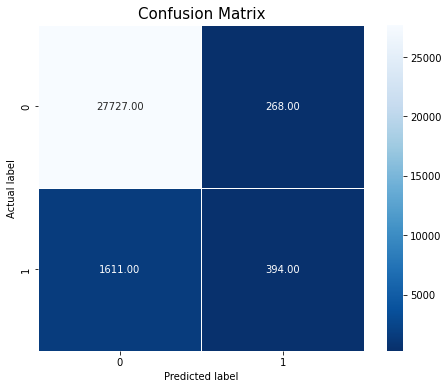

In [125]:
#confusion matrix
cm = metrics.confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

In [126]:
#classification report: recall, precision, f1-score, accuracy
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27995
           1       0.60      0.20      0.30      2005

    accuracy                           0.94     30000
   macro avg       0.77      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



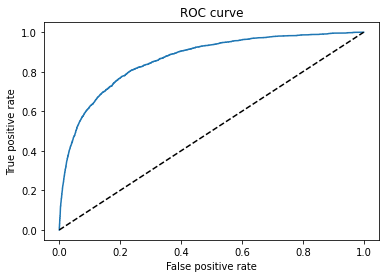

In [127]:
#ROC_curve
plot_roc(y_valid, y_pred_proba)

In [128]:
#AUC score
roc_auc_score(y_valid, y_pred_proba)

0.864291031663563

### Observation
* WOE has improved both Precison(0.58) and recall(0.20) achieving a good AUC score of 0.862

### Let's further investige important features

In [129]:
#logistic regrssion with p-values function
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs, max_iter=300)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [130]:
#logistic regression object
lr_p = LogisticRegression_with_p_values()

In [131]:
lr_p.fit(X_train, y_train.ravel())

In [132]:
#creating a dataframe with feature name, p_values and logistic regression coefficient
summary_table = pd.DataFrame(columns = ['Feature name'], data = woe_train_inputs.columns.values)
summary_table['Coefficients'] = np.transpose(lr_p.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', lr_p.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = lr_p.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values

In [133]:
#pd.options.display.max_rows = None
summary_table.head(5)

,Feature name,Coefficients,p_values
0,Intercept,-3.521737,NaN
1,PastDue30-59:11-13-96-10,1.373466,1.779866e-01
2,PastDue30-59:98-6-7-12,0.683183,1.256789e-05
3,PastDue30-59:5-4,1.414722,1.019598e-61
4,PastDue30-59:3,1.286850,1.751738e-76


In [134]:
summary_table[summary_table['p_values'] > 0.05]

,Feature name,Coefficients,p_values
1,PastDue30-59:11-13-96-10,1.373466,0.177987
5,PastDue30-59:9-8,0.198847,0.684291
8,PastDue60-89:11-96-6-9,1.145287,0.058713
11,PastDue60-89:7-8,0.324249,0.711493
18,PastDue90:12-13-14,0.879486,0.309289
21,NumberOfDependents:>9,-0.546679,0.706877
23,NumberOfDependents:4,0.148343,0.078484
25,NumberOfDependents:2,0.056472,0.159409
26,NumberOfDependents:7,0.101852,0.868353
27,NumberOfDependents:5,0.193292,0.234139


### RELEVANT FEATURES
* Using 5% significance value.
* Any Original Feature having all its dummy variable greater the 5% would be dropped.
* All features have at least one statistically significant variable.
* Although, Features like Age, Number of Dependents,Monthly Income, Number of open credit and Number of Real Estate have many statistically insignificant variable. This implies they have low predictive power.



In [135]:
dummy_drop = list(woe_train_inputs.filter(regex='Depend').columns) + list(woe_train_inputs.filter(regex='age').columns) 

In [136]:
woe_train_inputs_copy = woe_train_inputs.copy()
woe_test_inputs_copy = woe_test_inputs.copy()

In [137]:
woe_train_inputs_copy.drop(dummy_drop, axis = 1, inplace = True)

In [138]:
woe_test_inputs_copy.drop(dummy_drop, axis = 1, inplace = True)

In [139]:
X_train, X_valid, y_train, y_valid = train_test_split(woe_train_inputs_copy.values, df_train_target.values,
                                                      test_size = 0.2, random_state = 42, stratify = df_train_target.values)

In [140]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(120000, 73)
(120000, 1)
(30000, 73)
(30000, 1)


In [141]:
lr_woe = LogisticRegression(max_iter=300, solver = 'liblinear')

In [142]:
#fit logistic regression
lr_woe.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=300, solver='liblinear')

In [143]:
#predictions 1 or 0
y_pred = lr_woe.predict(X_valid)

In [144]:
#predictions in probalities
y_pred_proba = lr_woe.predict_proba(X_valid)
y_pred_proba = y_pred_proba[: , 1]

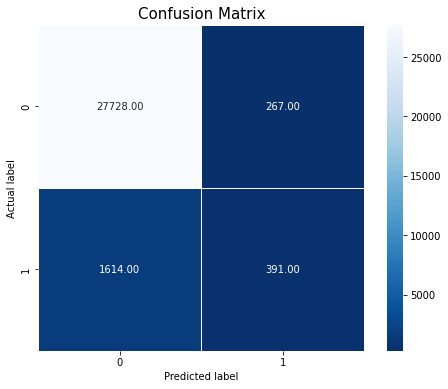

In [145]:
#confusion matrix
cm = metrics.confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

In [146]:
#classification report: recall, precision, f1-score, accuracy
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27995
           1       0.59      0.20      0.29      2005

    accuracy                           0.94     30000
   macro avg       0.77      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



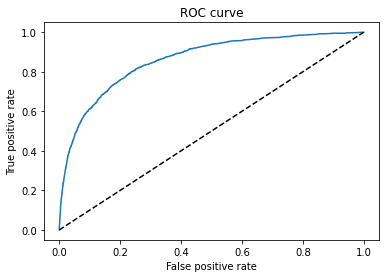

In [147]:
#ROC_curve
plot_roc(y_valid, y_pred_proba)

In [148]:
#AUC score
roc_auc_score(y_valid, y_pred_proba)

0.8607994926062232

## RANDOM FOREST CLASSIFIER
***

In [149]:
def rf_func(target, *data):
    precision = []
    recall = []
    f1_score_ = []
    auc_ = []
    for df in data:
        X_train, X_valid, y_train, y_valid = train_test_split(df.values, target.values,
                                                      test_size = 0.2, random_state = 42, stratify = target.values)
        
        rf = RandomForestClassifier(n_estimators=500)
        rf.fit(X_train, y_train.ravel())
        rf_pred = rf.predict(X_valid)
        rf_pred_proba = rf.predict_proba(X_valid)
        rf_pred_proba = rf_pred_proba[: , 1]
        precision.append(round(precision_score(y_valid, rf_pred, average=None)[1], 2))
        recall.append(round(recall_score(y_valid, rf_pred, average=None)[1], 2))
        f1_score_.append(round(f1_score(y_valid, rf_pred, average=None)[1], 2))
        auc_.append(round(roc_auc_score(y_valid, rf_pred_proba), 3))
    return pd.DataFrame([precision, recall, f1_score_, auc_], index = ['Precision', 'recall',
                                                                      'f1_score', 'auc'],
                       columns = ['Original Features', 'WOE_Features', 'WOE_Features_Trimmed'])

In [150]:
df_ = rf_func(df_train_target, df_train_inputs, woe_train_inputs, woe_train_inputs_copy)
df_.T

,Precision,recall,f1_score,auc
Original Features,0.57,0.19,0.28,0.850
WOE_Features,0.46,0.16,0.24,0.819
WOE_Features_Trimmed,0.45,0.19,0.27,0.794


## Observations
- Comparing Random Forest classifier across the 3 different datasets shows that it performs best on the Original datasets.
- This result is equivalent to the one achieved using Logistic Regression on WOE Engineered Features.
- This confirms the basic principle of Weight of Evidence, it breaks down a variable to classes with similar informative power on the target variable
- Which is similar to the basic algorithimic principle of Random Forest: collection of decision trees that looks for the most informative data point (test construction) from the best feature to achieve a pure leaf using few hierachical questions as possible.
- Henceforth, Original Dataset would be used for training RF Classifier while WOE dummy features would be used for training Logistic Regression Model
- we shall perform hyperparameter tuning to find the best combination of hyperparameters to optimize the performance of both Classifiers.
- We shall also compare the most important Features from both models.

In [151]:
#import libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV , StratifiedShuffleSplit

In [152]:

#Construct some pipelines

pipe_lr = Pipeline([('clf', LogisticRegression(random_state=42, max_iter=300))])

pipe_rf = Pipeline([('clf', RandomForestClassifier(max_features = 'auto', random_state=0, n_estimators=500, n_jobs=-1))])

#Set grid search params

grid_params_lr = [{'clf__penalty': ['l1','l2'],
            'clf__C': [0.1, 0.2, 1, 2],
            'clf__solver': ['liblinear','lbfgs']}] 

grid_params_rf = [{'clf__min_samples_leaf': [2,5],
                'clf__max_depth': [5,10],
                'clf__min_samples_split': [3,5]}]

#Construct grid searches

gs_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='roc_auc',
            cv = StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state = 0), 
            n_jobs=-1)

gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='roc_auc',
            cv = StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state = 0),
            n_jobs=-1)


#List of pipelines for ease of iteration
grids = [gs_lr, gs_rf]

#Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Random Forest'}


#Fit the grid search objects
print('Performing model optimizations...')

for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    if idx == 0:
        gs.fit(woe_train_inputs.values, df_train_target)
        # Best params
        print('Best params: %s' % gs.best_params_)
        # Best Score
        print('Best AUC score: %.4f' % gs.best_score_)
    else:
        gs.fit(df_train_inputs.values, df_train_target)
        # Best params
        print('Best params: %s' % gs.best_params_)
        # Best Score
        print('Best AUC score: %.4f' % gs.best_score_)

Performing model optimizations...

Estimator: Logistic Regression


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best AUC score: 0.8606

Estimator: Random Forest


/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Best params: {'clf__max_depth': 10, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 3}
Best AUC score: 0.8643


In [153]:
#import libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [154]:
#loading best parameters
lr = LogisticRegression(C=0.1, max_iter=300, solver='liblinear', penalty='l2')
rf = RandomForestClassifier(n_estimators=500, random_state=10 , min_samples_leaf=5, max_depth=10,
                            min_samples_split=3, n_jobs=-1)

In [155]:
#stratified kfold
scoring = 'roc_auc'
models = []
models.append(('LR', lr))
models.append(('RFG', rf))
names = []
results = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=3, shuffle=True , random_state = 47)
    if name == 'LR':
        cv_results = cross_val_score(model, woe_train_inputs.values, df_train_target.values, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    else:
        cv_results = cross_val_score(model, df_train_inputs.values, df_train_target.values, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LR: 0.860854 (0.002020)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


RFG: 0.864631 (0.002388)


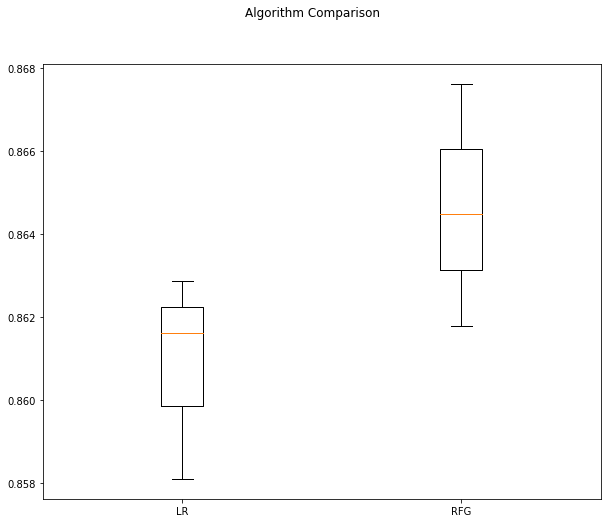

In [156]:
# Compare Algorithms
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## PRECISION, RECALL TRADEOFF
***

In [157]:
def trade_off(clf, train_input, target):
    X_train, X_valid, y_train, y_valid = train_test_split(train_input.values, target.values.ravel(),
                                                     test_size = 0.2, random_state = 42,
                                                      stratify = target.values.ravel())
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_valid)
    clf_pred_proba = clf.predict_proba(X_valid)
    clf_pred_proba = clf_pred_proba[:, 1]
    predictions = pd.concat([pd.DataFrame(clf_pred_proba), pd.DataFrame(clf_pred)],  axis = 1)
    predictions.columns = ['probability', 'class']
    precision_recall_df = pd.DataFrame({'precision':[0,0,0,0], 'recall':[0,0,0,0], 'f1_score':[0,0,0,0],
                                   'auc_score':[0,0,0,0]}, index = ['threshold:0.3', 'threshold:0.4',
                                                                   'threshold:0.5', 'threshold:0.6'])
    for threshold, idx in zip([0.3, 0.4, 0.5, 0.6], precision_recall_df.index.values):
        predictions['class_temp'] = np.where(predictions['probability'] > threshold, 1, 0)
        precision_recall_df.loc[idx, 'precision'] = round(precision_score(y_valid, predictions['class_temp'],
                                                                      average=None)[1], 2)
        precision_recall_df.loc[idx, 'recall'] = round(recall_score(y_valid, predictions['class_temp'],
                                                                average=None)[1], 2)
        precision_recall_df.loc[idx, 'f1_score'] = round(f1_score(y_valid, predictions['class_temp'],
                                                              average=None)[1], 2)
        precision_recall_df.loc[idx, 'auc_score'] = round(roc_auc_score(y_valid, predictions['probability']), 3)
    return precision_recall_df
    

In [158]:
trade_off(rf, df_train_inputs, df_train_target)

,precision,recall,f1_score,auc_score
threshold:0.3,0.46,0.40,0.43,0.868
threshold:0.4,0.55,0.27,0.36,0.868
threshold:0.5,0.61,0.16,0.26,0.868
threshold:0.6,0.70,0.07,0.13,0.868


In [159]:
trade_off(lr, woe_train_inputs, df_train_target)

,precision,recall,f1_score,auc_score
threshold:0.3,0.50,0.34,0.41,0.864
threshold:0.4,0.55,0.25,0.35,0.864
threshold:0.5,0.60,0.18,0.28,0.864
threshold:0.6,0.64,0.13,0.21,0.864


> There is always a trade-off between model precision and recall, base on the nature of the  business problem. A precision focused model is a cautious model that puts more emphasis on lowering false positives. This type of model is very strict and highly discriminatory to a particular class. It uses a higher threshold (probability) value to assign a data point to a positive class (event). The higher the threshold the higher the precision of a model.<br>
On the other hand, a recall based model is more oriented in lowering false negatives. This type of model don't want a positive data point to go unnoticed. A lower threshold value means the model is less strict in discriminating between the two classes and would classify any data point with a inkling of positive attribute to a positive class.<br>
When giving out loans, it is often better to deny a potentially good customer than to approve a high risk borrower. Hence, our model would be recall specific. Although, optimizing our model to be more skillful is generally preferred.<br>
Comparing the scores from both classifiers. Random forest is more skillful with AUC score of 0.868 to Logistic Regression's 0.864. Relative to other thresholds, using a threshold of 0.3 would give the best balance between precision (0.46) and recall (0.40).

In [160]:
lr.fit(woe_train_inputs.values, df_train_target.values.ravel())
lr_pred = lr.predict(woe_test_inputs.values)
lr_pred_proba = lr.predict_proba(woe_test_inputs.values)
lr_pred_proba = lr_pred_proba[:, 1]

In [161]:
lr_woe_model = pd.DataFrame({'Id': df_test.index.values,
                                 'Probability': lr_pred_proba})
lr_woe_model.set_index(keys = 'Id', inplace = True)
lr_woe_model

,Probability
Id,
1,0.071803
2,0.088813
3,0.018367
4,0.078626
5,0.093148
...,...
101499,0.031136
101500,0.331326
101501,0.012456


In [162]:
rf.fit(df_train_inputs.values, df_train_target.values.ravel())

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=3,
                       n_estimators=500, n_jobs=-1, random_state=10)

In [163]:
rf_pred = rf.predict(df_test_inputs.values)
rf_pred_proba = rf.predict_proba(df_test_inputs.values)
rf_pred_proba = rf_pred_proba[:, 1]

In [164]:
rf_model = pd.DataFrame({'Id': df_test.index.values,
                                 'Probability': rf_pred_proba})
rf_model.set_index(keys = 'Id', inplace = True)
rf_model.head(10)

,Probability
Id,
1,0.073406
2,0.037763
3,0.015771
4,0.071506
5,0.105764
6,0.030431
7,0.056184
8,0.043556
9,0.005062


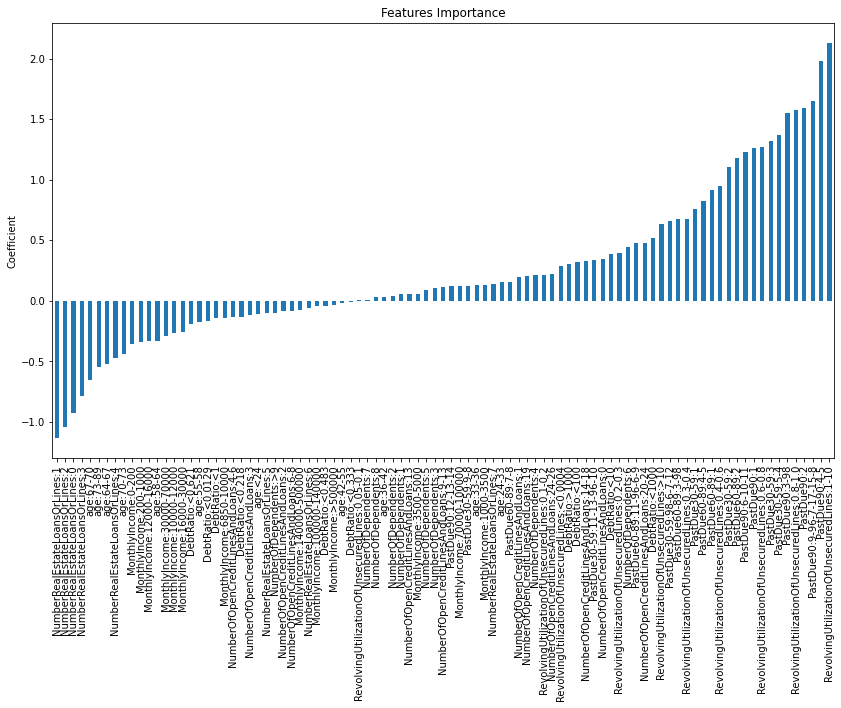

In [165]:
importance = lr.coef_[0]
feat_importances = pd.DataFrame(importance, index=woe_train_inputs.columns.values, columns=['Score'])
feat_importances = feat_importances.sort_values(by='Score',ascending=True)
feat_importances.plot(kind='bar', title='Features Importance',legend=False, figsize=(14,8))
#plt.xlabel('Importance Score')
plt.ylabel('Coefficient')
plt.show()

### COEFFICIENTS OF LOGISTIC REGRESSION
* Coefficient of a Feature in a Logistic Regression indicates its predictive strength and the class it favours
* The further away from zero the higher the predictive power.
* Coefficients greater than zero is indicative of the event class (target:1) while negative coefficients tends towards the no-event class (target:0). Here, event means default and no-event means non-default
* Coefficients closer to zero are indifferent to either class
* The graph of coefficients above is bidirectional
* Features on the far right are indicative of a defaulting Borrower
* Revolving Credit Utilization and Number of Days past due are important features in predicting the likelihood of a Borrower defaulting
* Borrowers with Credit Utilization beyond 0.5 are high risk
* Borrowers that defaulted on their loan at least twice for 90 days are high risk 
* Borrowers that defaulted on their loan more than 3 times for 60-89 days are high risk
* Borrowers that defaulted on their loan more than 4 times for 30-59 days should also be considered high risk
* While Age, Number of Dependents, Monthly Income, Debt Ratio and others apart from the ones above are generally class indifferent, some categories are worth noting.
* Older customers (>65) are less likely to default.
* Debt Ratio above 10 are high risk.
* Borrowers with at least 6 dependents are high risk

In [166]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

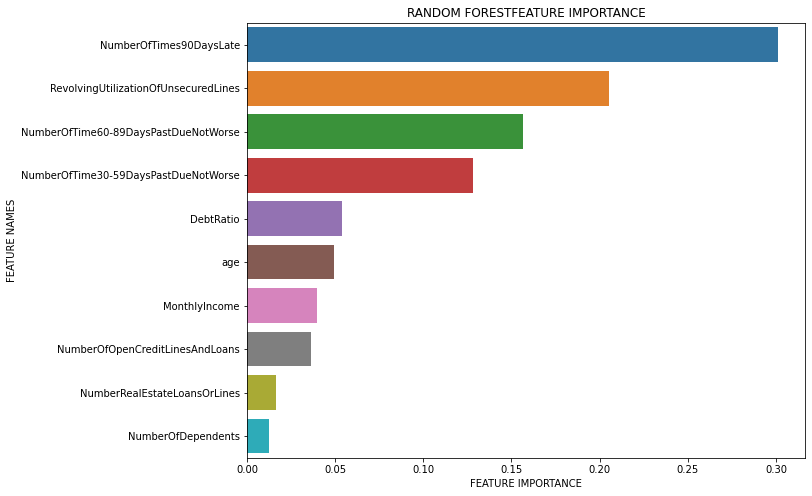

In [167]:
plot_feature_importance(rf.feature_importances_,df_train_inputs.columns,'RANDOM FOREST')

### RANDOM FOREST FEATURE IMPORTANCE
The value assigned to Random Forest Features measure their predictive power but they are not class indicative. It tells how informative the features are in splitting the target variable into distinctive classes. The above graph further tells us that Number of Days past due (30, 60 and 90) and Revolving Credit Utilization are the most important features for our PD model.

In [168]:
rf_model.to_csv('submission.csv')